In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Bug Report classification"

'Bug Report Classification.ipynb'   JIRA_2.csv	 JIRA_4.csv   JIRA_6.csv
 JIRA_1.csv			    JIRA_3.csv	 JIRA_5.csv


In [ ]:
data2=pd.read_csv("/content/drive/My Drive/Bug Report classification/JIRA_1.csv")
data3=pd.read_csv("/content/drive/My Drive/Bug Report classification/JIRA_2.csv")
data4=pd.read_csv("/content/drive/My Drive/Bug Report classification/JIRA_3.csv")
data6=pd.read_csv("/content/drive/My Drive/Bug Report classification/JIRA_4.csv")
data7=pd.read_csv("/content/drive/My Drive/Bug Report classification/JIRA_5.csv")
data8=pd.read_csv("/content/drive/My Drive/Bug Report classification/JIRA_6.csv")
data = pd.concat([data2,data3,data4, data6,data7,data8])

In [ ]:
data.head()

,Summary,Issue key,Issue id,Parent id,Issue Type,Status,Project key,Project name,Project type,Project lead,...,Custom field (Source Control Link),Custom field (Space Description),Custom field (Space Key),Custom field (Space Name),Custom field (Test and Documentation Plan),Custom field (Testcase included),Comment,Outward issue link (Cloners),Log Work,Custom field (Review Patch?)
0,Remove suggester dependency on misc,LUCENE-7612,13031280,NaN,Functional,Resolved,LUCENE,Lucene - Core,software,ehatcher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"SynonymFilter should generate a correct (or, a...",LUCENE-6582,12838764,NaN,Ui,Resolved,LUCENE,Lucene - Core,software,ehatcher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BooleanQuery.setMaxClauseCount(int) is static,LUCENE-998,12378266,NaN,Ui,Closed,LUCENE,Lucene - Core,software,ehatcher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Move ValueSource and FunctionValues under core/,LUCENE-5325,12677286,NaN,Functional,Resolved,LUCENE,Lucene - Core,software,ehatcher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AnalyzingInfixSuggesterTest.testRandomNRT() fa...,LUCENE-7605,13030812,NaN,Ui,Resolved,LUCENE,Lucene - Core,software,ehatcher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols_of_interest=["Issue key","Issue id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last Viewed","Resolved","Issue Type"]
dataset=data[cols_of_interest]
print(dataset.shape)
dataset.head()

(5347, 13)


,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,LUCENE-7612,13031280,Remove suggester dependency on misc,Resolved,"AnalyzingInfixSuggester uses IndexSorter, whic...",Major,Fixed,romseygeek,30/Dec/16 14:31,03/Jan/17 14:11,30/Sep/19 08:28,03/Jan/17 14:11,Functional
1,LUCENE-6582,12838764,"SynonymFilter should generate a correct (or, a...",Resolved,"Some time ago, I had a problem with synonyms a...",Major,Duplicate,NaN,18/Jun/15 11:28,03/Jan/17 10:52,30/Sep/19 08:28,03/Jan/17 10:52,Ui
2,LUCENE-998,12378266,BooleanQuery.setMaxClauseCount(int) is static,Closed,BooleanQuery.setMaxClauseCount(int) is static....,Major,Won't Fix,NaN,14/Sep/07 09:27,03/Jan/17 02:58,30/Sep/19 08:28,10/Aug/08 00:41,Ui
3,LUCENE-5325,12677286,Move ValueSource and FunctionValues under core/,Resolved,Spinoff from LUCENE-5298: ValueSource and Func...,Major,Fixed,romseygeek,03/Nov/13 19:47,29/Dec/16 20:29,30/Sep/19 08:28,29/Dec/16 20:29,Functional
4,LUCENE-7605,13030812,AnalyzingInfixSuggesterTest.testRandomNRT() fa...,Resolved,"While beasting for LUCENE-7564, I found these ...",Major,Fixed,NaN,28/Dec/16 02:49,28/Dec/16 19:19,30/Sep/19 08:28,28/Dec/16 19:19,Ui


In [ ]:
# Removing contents of tags and all for further text processing
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')

# Removing links from all for further text processing
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')

# Replace email addresses
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')

# Replace URLs with 'web-address'
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')

# Replace 10 digit phone numbers
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')

# Replace numbers with 'numbr'
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')

# Remove punctuation
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')

#converting to lower case
dataset['Description'] = dataset['Description'].str.lower()
dataset['Summary'] = dataset['Summary'].str.lower()

# Removing non-english content
# dataset.drop(dataset[dataset.language!="english"].index,inplace=True)

# Removing rows with empty columns
dataset.dropna(subset=['Description','Summary'],inplace=True)
dataset.reset_index(inplace = True)

<ipython-input-26-87b6ebcc340f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')
<ipython-input-26-87b6ebcc340f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Description'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')
<ip

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        5229 non-null   int64 
 1   Issue key    5229 non-null   object
 2   Issue id     5229 non-null   int64 
 3   Summary      5229 non-null   object
 4   Status       5229 non-null   object
 5   Description  5229 non-null   object
 6   Priority     5229 non-null   object
 7   Resolution   5229 non-null   object
 8   Assignee     3587 non-null   object
 9   Created      5229 non-null   object
 10  Updated      5229 non-null   object
 11  Last Viewed  5229 non-null   object
 12  Resolved     5229 non-null   object
 13  Issue Type   5229 non-null   object
dtypes: int64(2), object(12)
memory usage: 572.0+ KB


In [ ]:
dataset['Issue Type']

,Issue Type
0,Functional
1,Ui
2,Ui
3,Functional
4,Ui
...,...
5224,Functional
5225,Functional
5226,Functional
5227,Ui


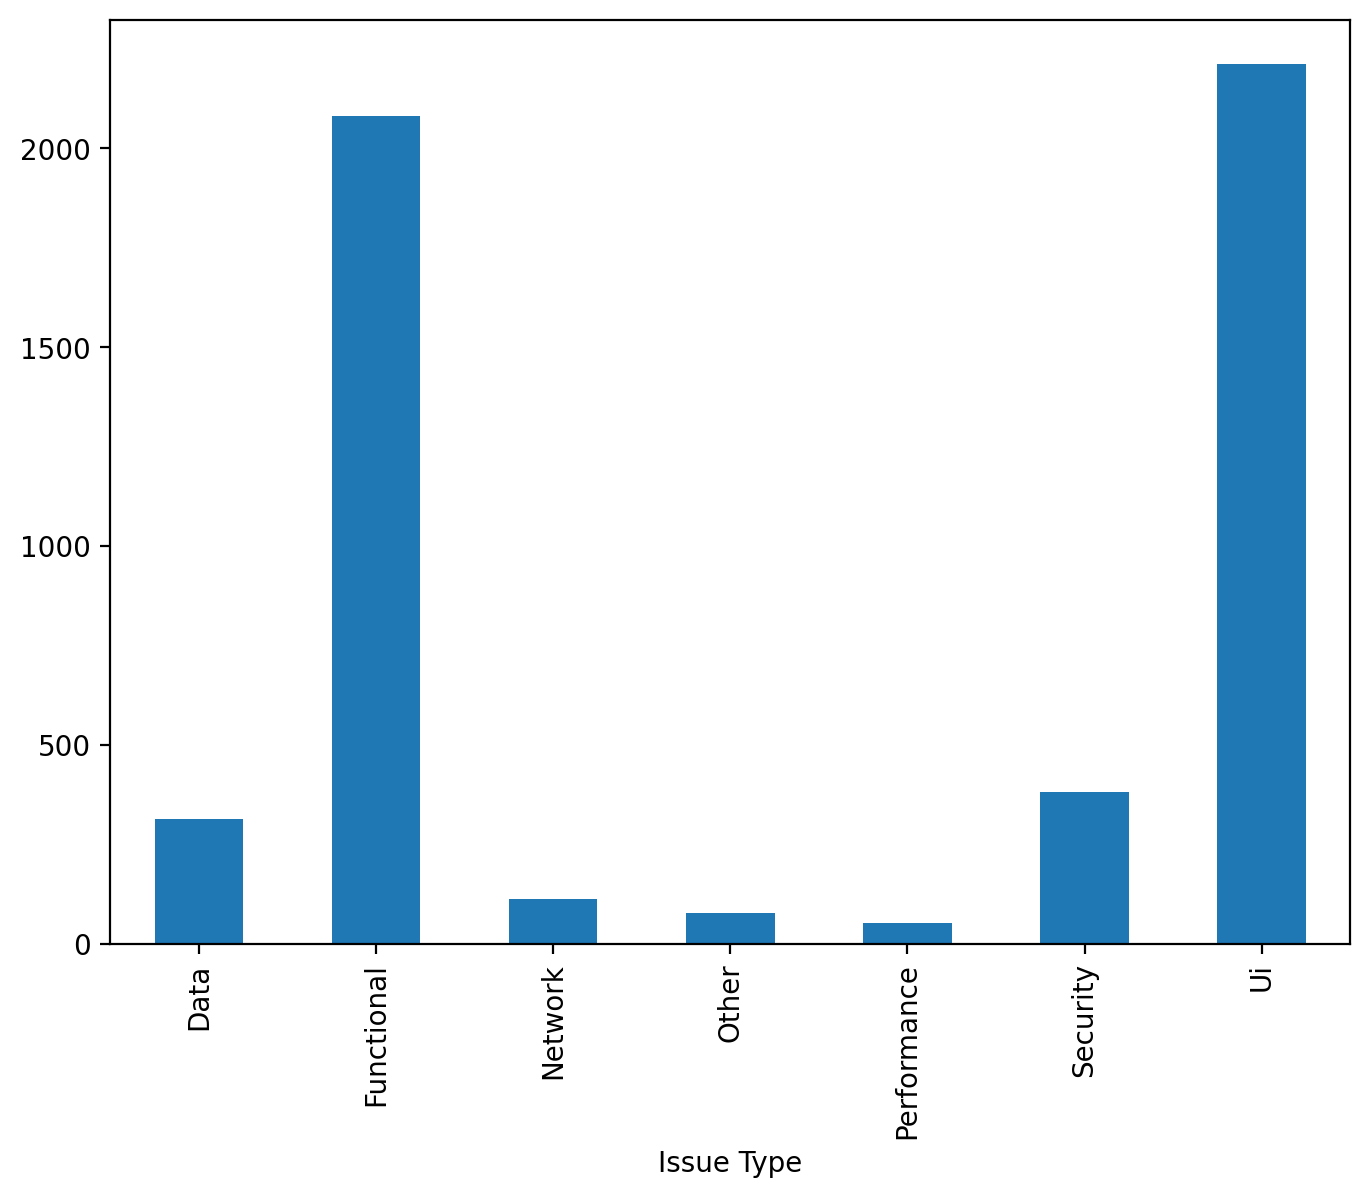

In [ ]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('Issue Type').Status.count().plot.bar(ylim=0)
plt.show()

In [ ]:
final_c=['Data','Functional','Network','Performance','Security','Ui','Other']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset["Issue Type"] = label.fit_transform(dataset["Issue Type"])
dataset.head()


<ipython-input-31-6db9c2585636>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Issue Type"] = label.fit_transform(dataset["Issue Type"])


,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,0,LUCENE-7612,13031280,remove suggester dependency on misc,Resolved,analyzinginfixsuggester uses indexsorter which...,Major,Fixed,romseygeek,30/Dec/16 14:31,03/Jan/17 14:11,30/Sep/19 08:28,03/Jan/17 14:11,1
1,1,LUCENE-6582,12838764,synonymfilter should generate a correct or at ...,Resolved,some time ago i had a problem with synonyms an...,Major,Duplicate,NaN,18/Jun/15 11:28,03/Jan/17 10:52,30/Sep/19 08:28,03/Jan/17 10:52,6
2,2,LUCENE-998,12378266,booleanquerysetmaxclausecountint is static,Closed,booleanquerysetmaxclausecountint is static it ...,Major,Won't Fix,NaN,14/Sep/07 09:27,03/Jan/17 02:58,30/Sep/19 08:28,10/Aug/08 00:41,6
3,3,LUCENE-5325,12677286,move valuesource and functionvalues under core,Resolved,spinoff from lucene valuesource and functionva...,Major,Fixed,romseygeek,03/Nov/13 19:47,29/Dec/16 20:29,30/Sep/19 08:28,29/Dec/16 20:29,1
4,4,LUCENE-7605,13030812,analyzinginfixsuggestertesttestrandomnrt failu...,Resolved,while beasting for lucene i found these reprod...,Major,Fixed,NaN,28/Dec/16 02:49,28/Dec/16 19:19,30/Sep/19 08:28,28/Dec/16 19:19,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        5229 non-null   int64 
 1   Issue key    5229 non-null   object
 2   Issue id     5229 non-null   int64 
 3   Summary      5229 non-null   object
 4   Status       5229 non-null   object
 5   Description  5229 non-null   object
 6   Priority     5229 non-null   object
 7   Resolution   5229 non-null   object
 8   Assignee     3587 non-null   object
 9   Created      5229 non-null   object
 10  Updated      5229 non-null   object
 11  Last Viewed  5229 non-null   object
 12  Resolved     5229 non-null   object
 13  Issue Type   5229 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 572.0+ KB


In [ ]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tfidf.fit(dataset.Summary)
transformed_summary = vectorizer.transform(dataset.Summary)
#transformed_title = vectorizer.transform(dataset.Description)

In [ ]:
dataset["Created"][26]

'12/Nov/16 12:20'

In [ ]:
feature_names = tfidf.get_feature_names_out()

In [ ]:
def get_tfidf_term_scores(feature_names):
    term_corpus_dict = {}
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_summary.T[term_ind].toarray())

    return term_corpus_dict

In [ ]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [ ]:
def get_sorted_tfidf_scores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]

    return termNames, scores

In [ ]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [ ]:
def plot_tfidf_scores(scores,termNames, n_words = 20):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    fig = plt.figure(figsize = (15, 15))

    override = {'fontsize': 'large'}

    fig.add_subplot(221)
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top tfidf score of top 20 words in Summary ".format(n_words));
    plt.xlabel("TFIDF Score")

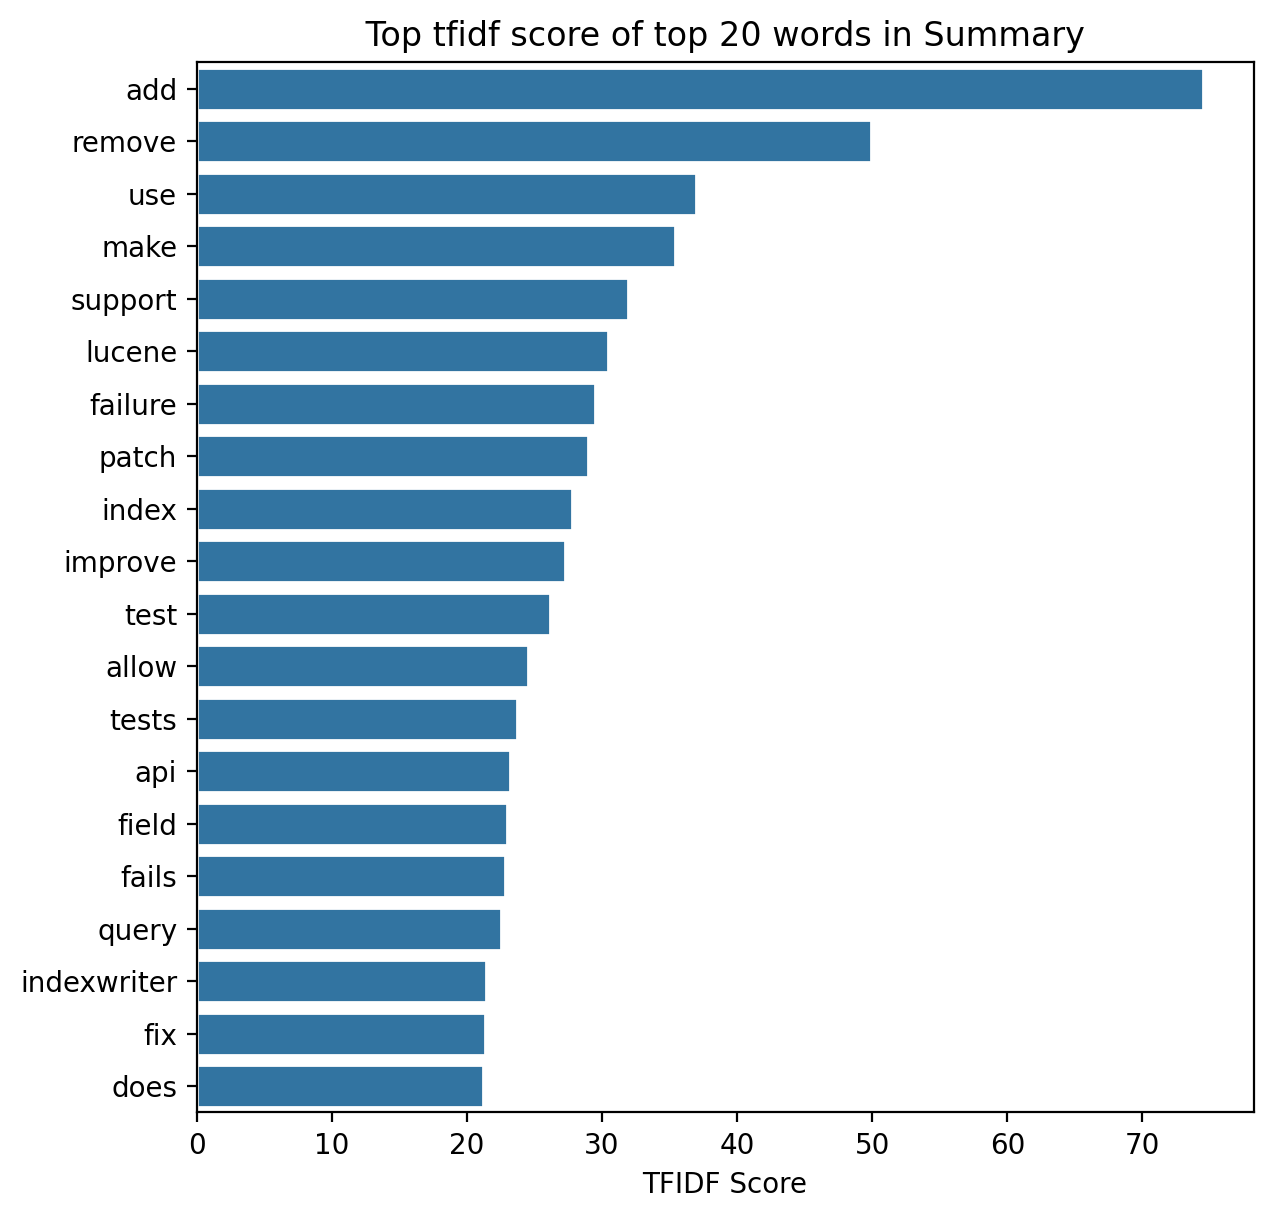

In [ ]:
plot_tfidf_scores(scores, termNames, n_words = 20)

In [ ]:
diff_corpus=list()
for i in range(0,7,1):
  diff_corpus.append(list())
for i in range(0,dataset.shape[0],1):
  diff_corpus[dataset["Issue Type"][i]].append(dataset.Summary[i])

In [ ]:
most_freq_w_in_class=list()

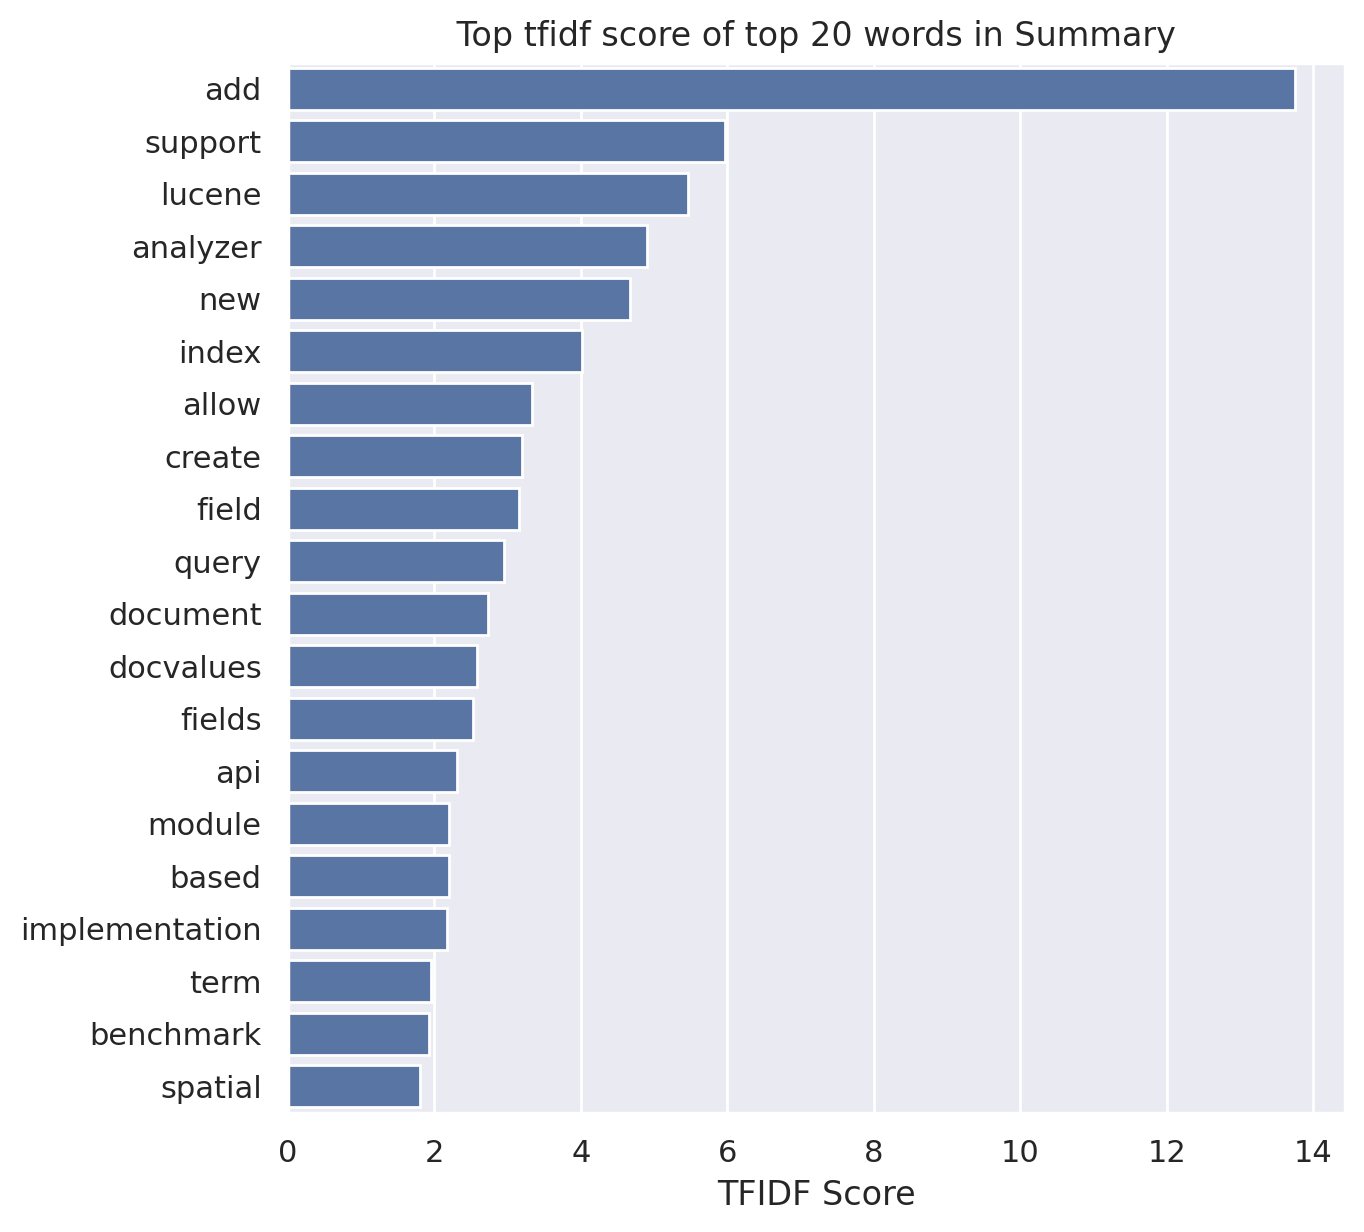

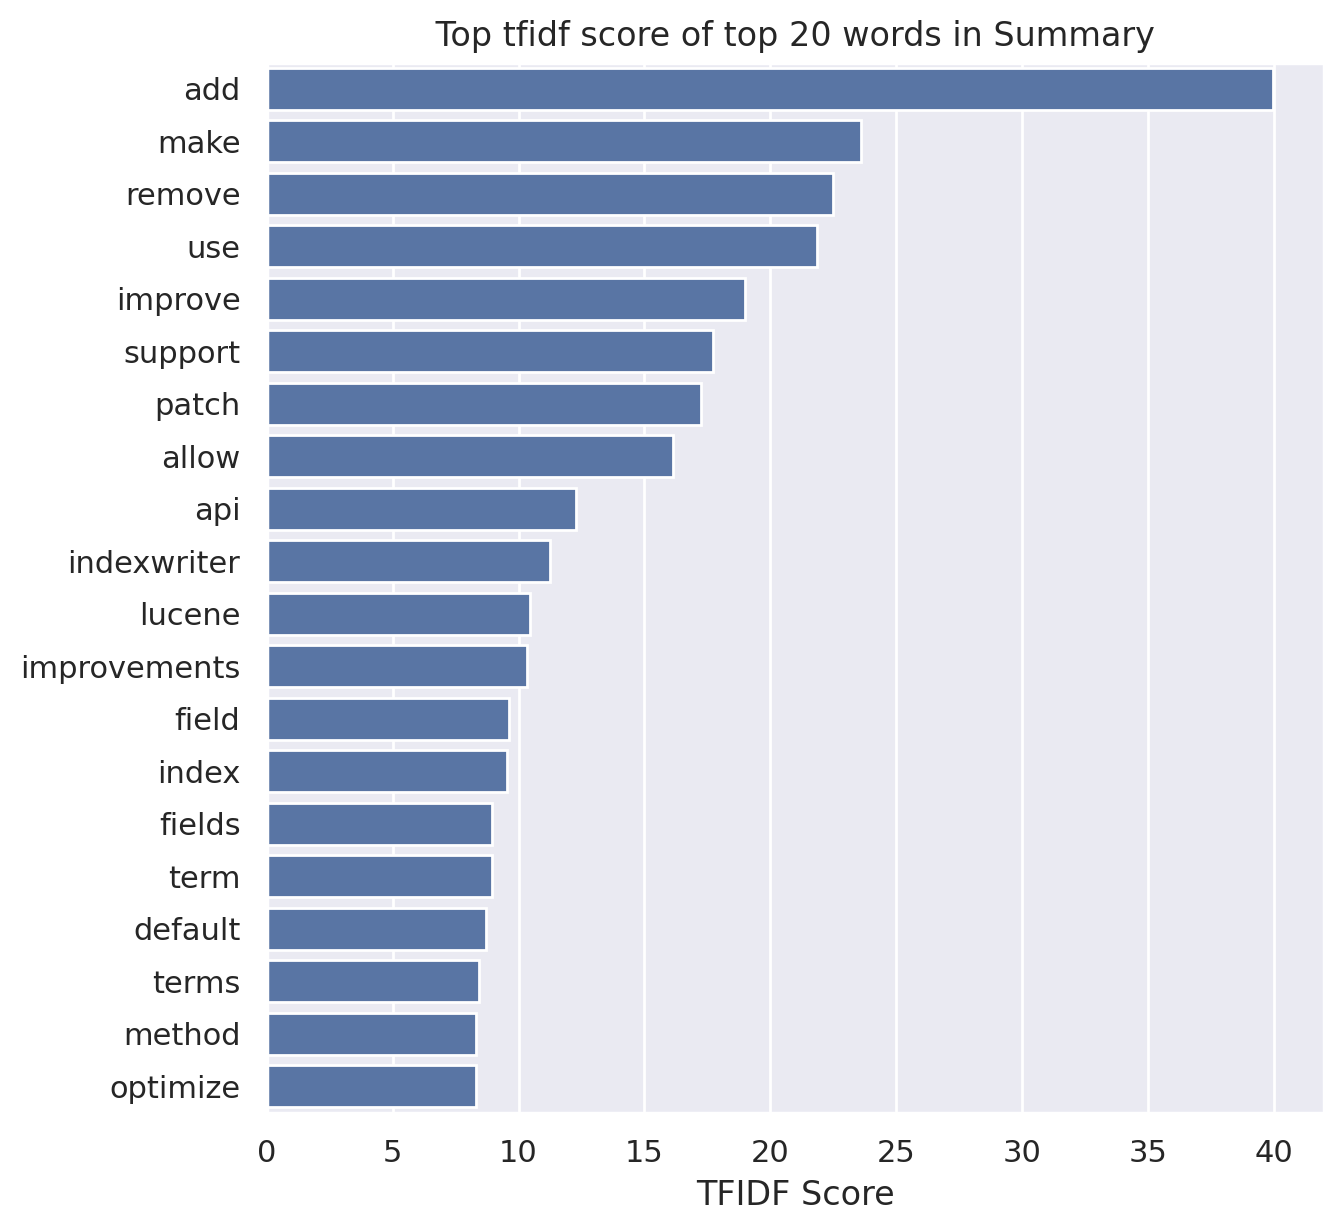

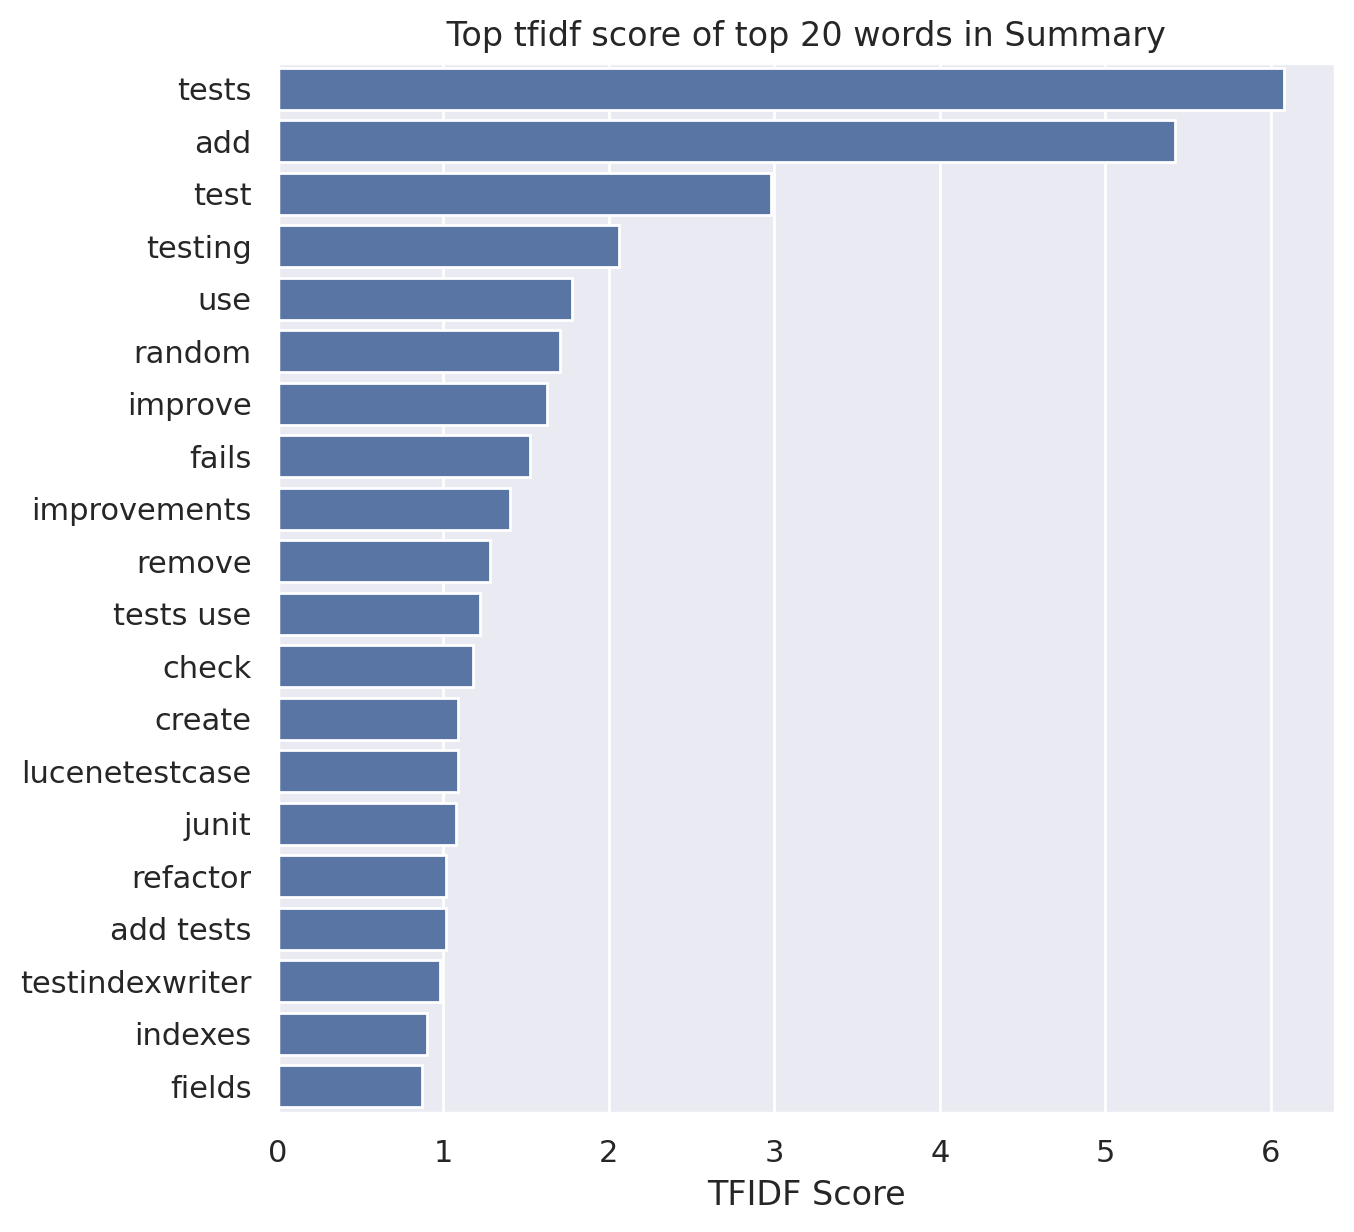

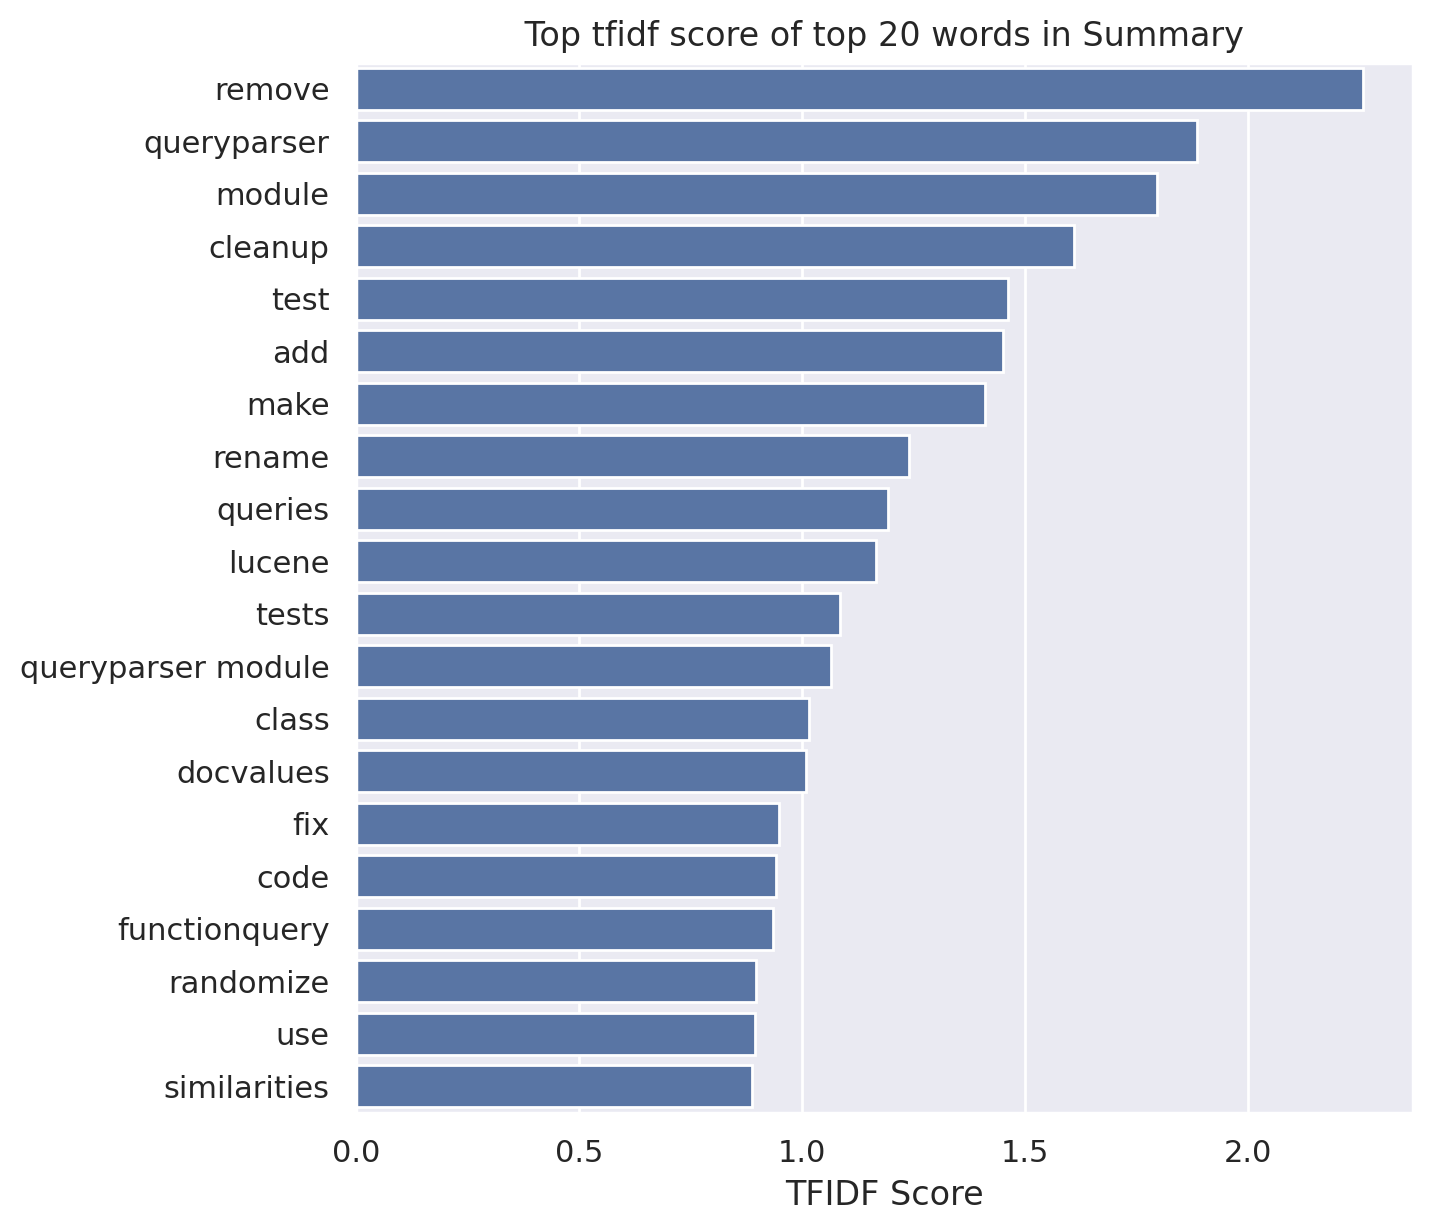

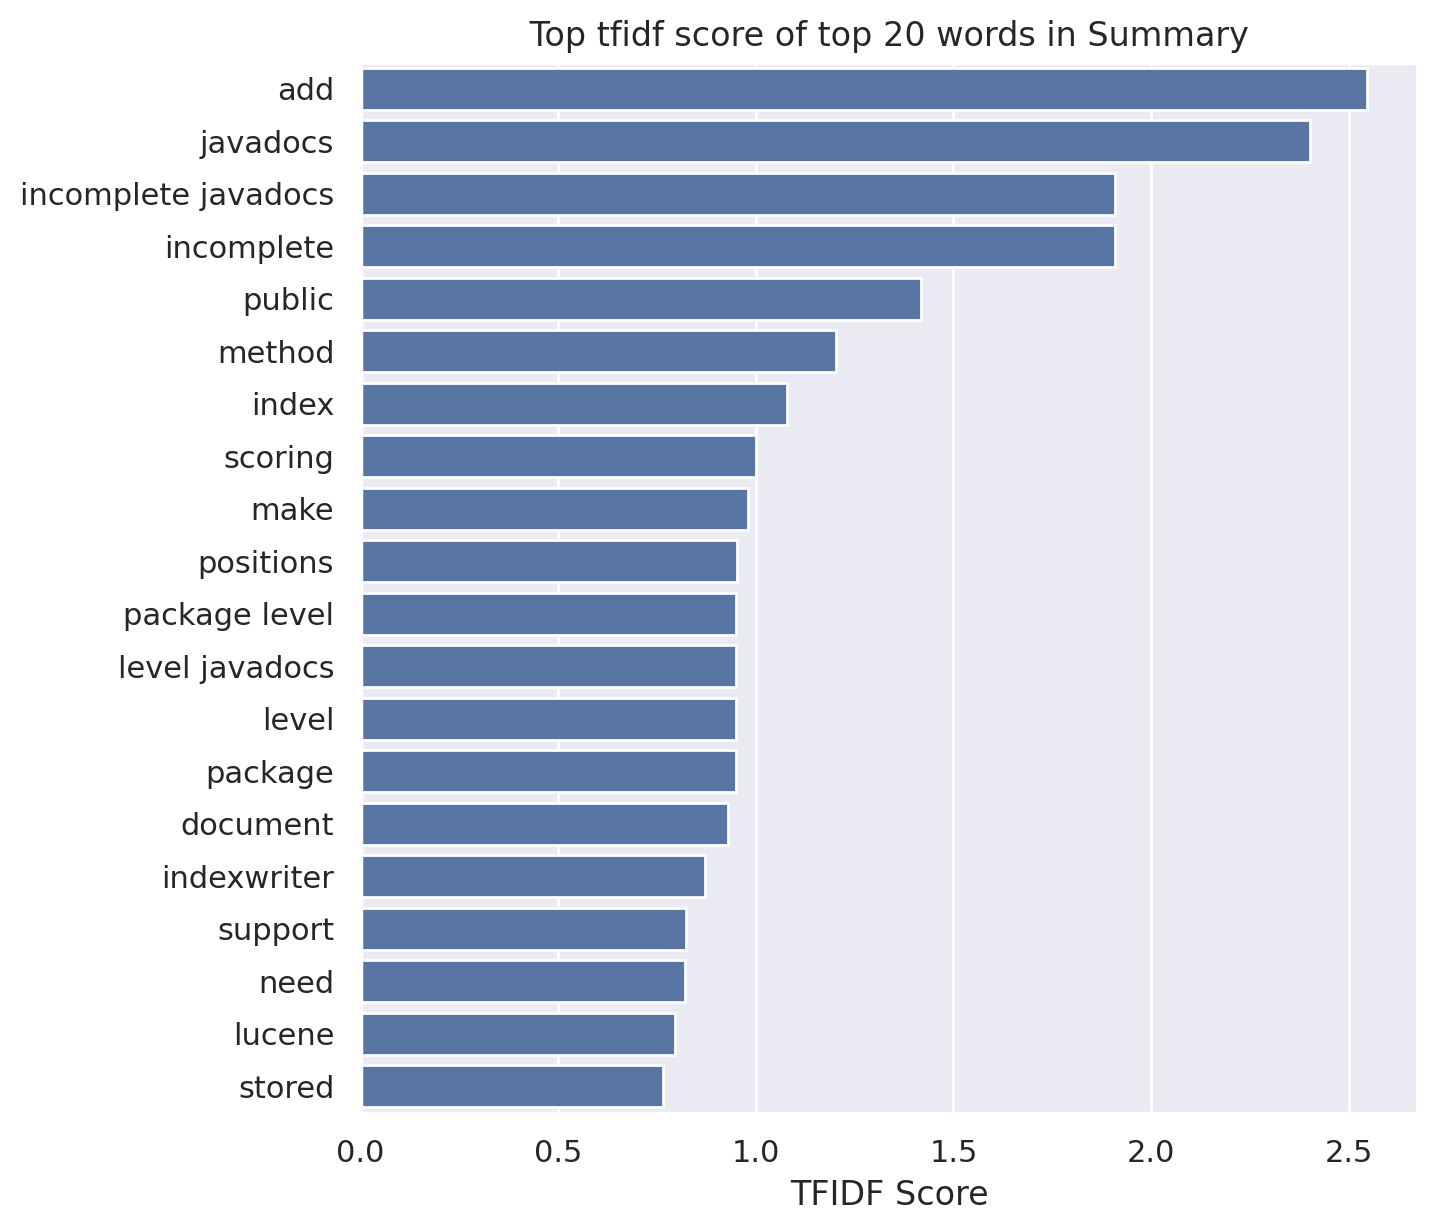

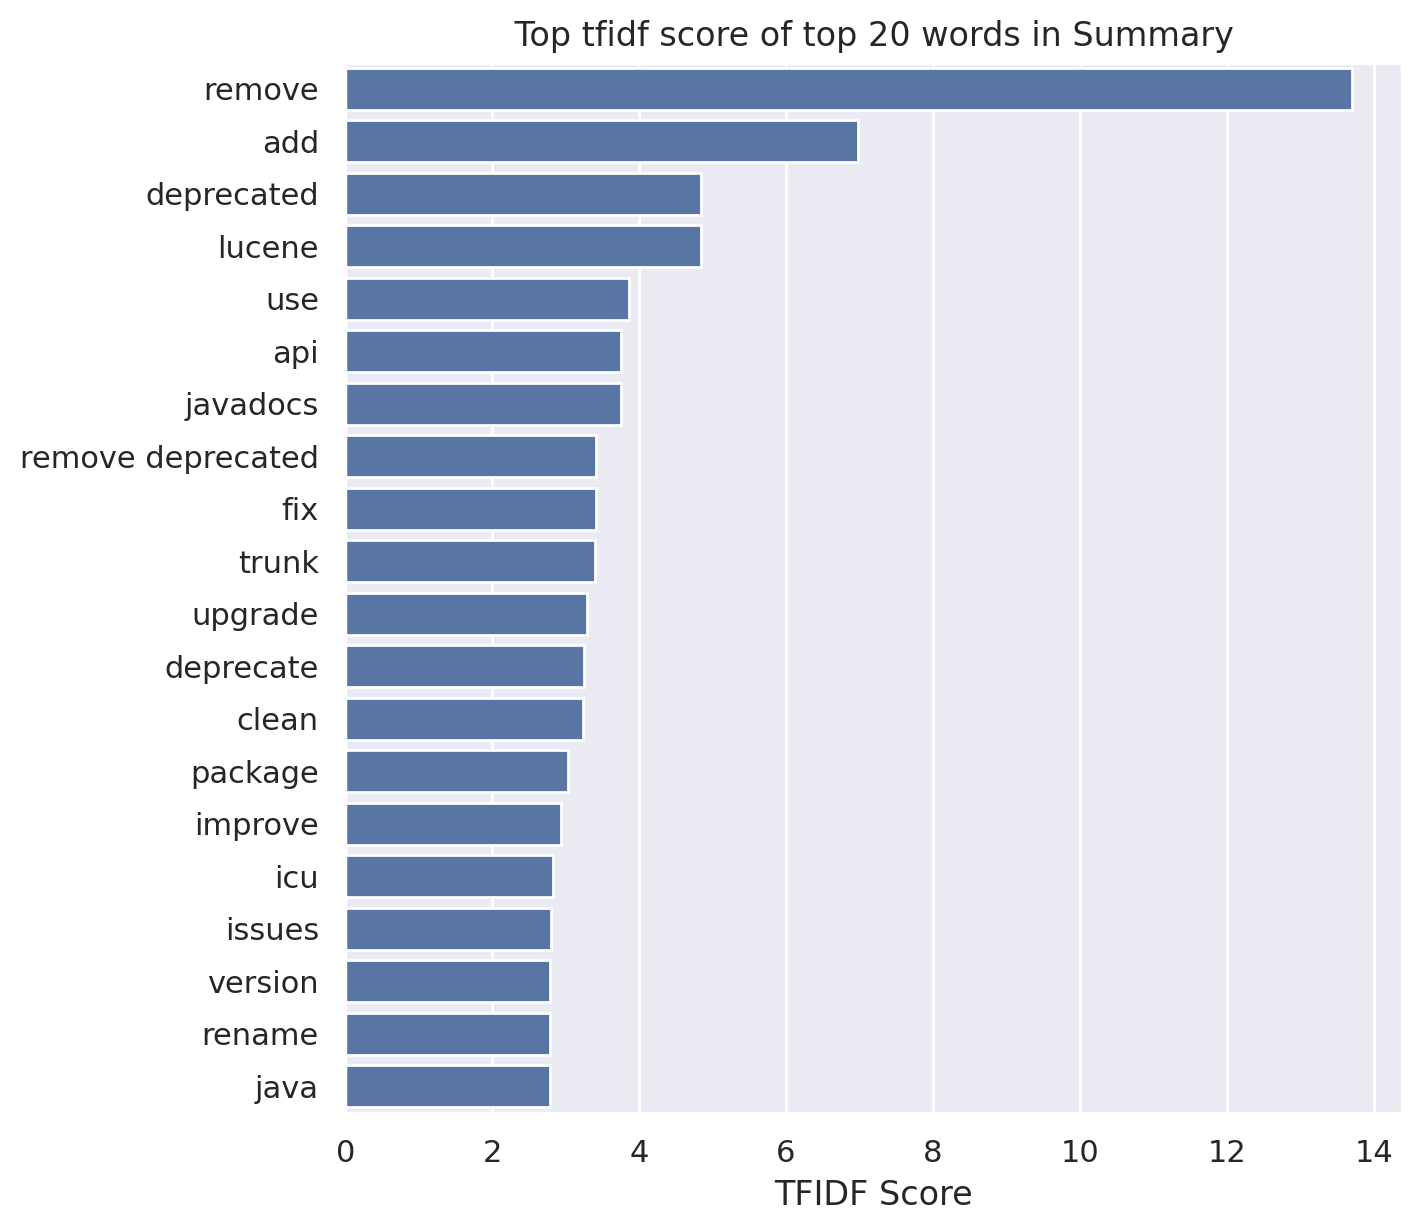

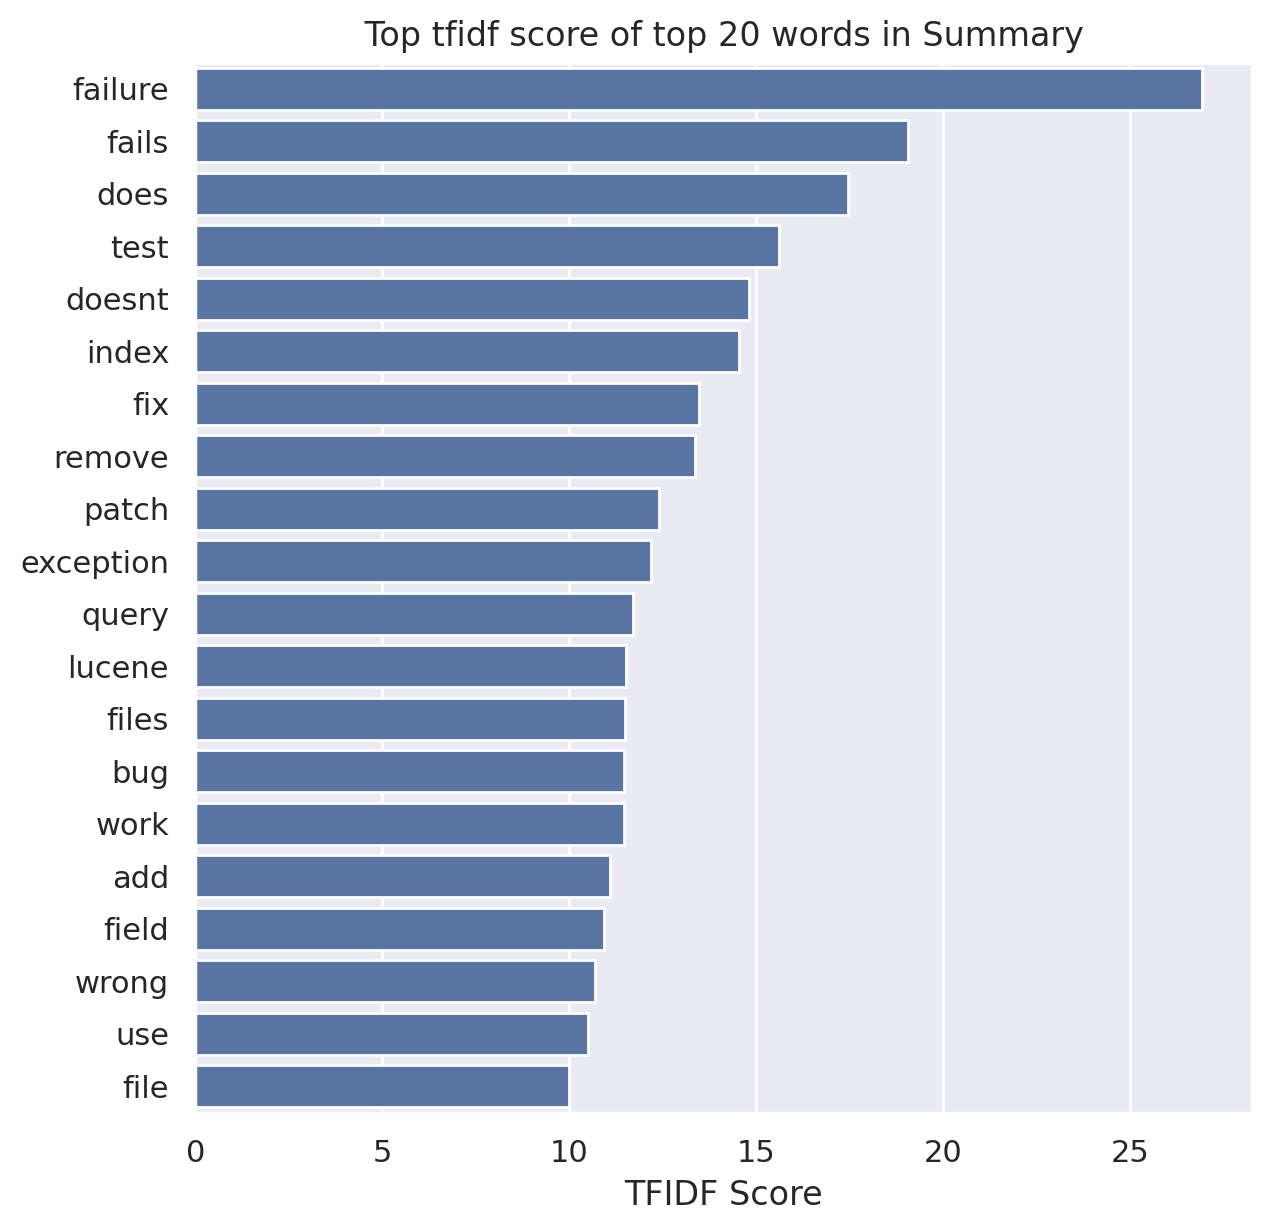

In [ ]:
for i in range(0,7,1):
  vectorizer = tfidf.fit(diff_corpus[i])
  transformed_summary = vectorizer.transform(diff_corpus[i])
  feature_names = tfidf.get_feature_names_out()
  term_corpus_dict = get_tfidf_term_scores(feature_names)
  termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)
  most_freq_w_in_class.append(list(termNames[0:10]))
  plot_tfidf_scores(scores, termNames, n_words = 20)

In [ ]:
#list(termNames[0:10])

In [ ]:
most_freq_w_in_class

[['add',
  'support',
  'lucene',
  'analyzer',
  'new',
  'index',
  'allow',
  'create',
  'field',
  'query'],
 ['add',
  'make',
  'remove',
  'use',
  'improve',
  'support',
  'patch',
  'allow',
  'api',
  'indexwriter'],
 ['tests',
  'add',
  'test',
  'testing',
  'use',
  'random',
  'improve',
  'fails',
  'improvements',
  'remove'],
 ['remove',
  'queryparser',
  'module',
  'cleanup',
  'test',
  'add',
  'make',
  'rename',
  'queries',
  'lucene'],
 ['add',
  'javadocs',
  'incomplete javadocs',
  'incomplete',
  'public',
  'method',
  'index',
  'scoring',
  'make',
  'positions'],
 ['remove',
  'add',
  'deprecated',
  'lucene',
  'use',
  'api',
  'javadocs',
  'remove deprecated',
  'fix',
  'trunk'],
 ['failure',
  'fails',
  'does',
  'test',
  'doesnt',
  'index',
  'fix',
  'remove',
  'patch',
  'exception']]

In [ ]:
type(dataset.Summary)

pandas.core.series.Series

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Data','Functional','Network','Performance','Security','Ui','Other']),
                 cells=dict(values=most_freq_w_in_class))])
fig.show()
#fig.suptitle('test title', fontsize=20)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
l_of_words=list()
for i in range(0,7,1):
  l_of_words.append(list())
for i in range(0,dataset.shape[0],1):
  for w in dataset.Summary[i].split():
    if w not in stop:
      l_of_words[dataset["Issue Type"][i]].append(w)

In [ ]:
for i in range(0,7,1):
  print("class "+str(i))
  print(l_of_words[i])

class 0
['add', 'docvalues', 'statistics', 'helpers', 'add', 'intrangefield', 'floatrangefield', 'longrangefield', 'add', 'new', 'rangefield', 'add', 'support', 'polygon', 'holes', 'geod', 'compute', 'geod', 'point', 'halfway', 'two', 'endpoints', 'measured', 'arc', 'distance', 'add', 'multidimensional', 'byte', 'indexing', 'support', 'lucene', 'add', 'docvaluesnumbersquery', 'like', 'docvaluestermsquery', 'works', 'long', 'values', 'add', 'indexwriter', 'api', 'write', 'segments', 'without', 'refreshing', 'add', 'support', 'fieldinfos', 'generation', 'create', 'searchertaxonomymanager', 'directory', 'allow', 'wrapping', 'reader', 'analyzerwrapper', 'add', 'simple', 'api', 'build', 'queries', 'analysis', 'chain', 'multivalued', 'docvalues', 'field', 'add', 'countingfacetsaggregator', 'reads', 'ordinals', 'cache', 'add', 'customanalyzer', 'builder', 'creates', 'analyzers', 'factory', 'classes', 'lucene', 'expressions', 'module', 'analyzing', 'suggester', 'add', 'distance', 'function', '

In [ ]:
word_list=list()
for i in range(0,7,1):
  word_list.append(list())
from collections import Counter
for i in range(0,7,1):
  Counte = Counter(l_of_words[i])
  most_occur = Counte.most_common(10)
  for ele in most_occur:
    word_list[i].append(ele[0])
  print(most_occur)


[('add', 85), ('support', 27), ('lucene', 27), ('new', 18), ('index', 17), ('analyzer', 15), ('allow', 13), ('field', 13), ('query', 12), ('create', 11)]
[('add', 244), ('make', 134), ('use', 130), ('remove', 105), ('support', 88), ('allow', 88), ('improve', 84), ('patch', 83), ('api', 58), ('index', 48)]
[('tests', 35), ('add', 24), ('test', 12), ('testing', 7), ('use', 6), ('improve', 5), ('random', 5), ('remove', 4), ('check', 4), ('fails', 4)]
[('remove', 8), ('move', 8), ('add', 6), ('test', 6), ('queryparser', 6), ('module', 6), ('cleanup', 5), ('tests', 5), ('make', 5), ('lucene', 4)]
[('add', 11), ('javadocs', 8), ('incomplete', 5), ('method', 4), ('support', 3), ('document', 3), ('stored', 3), ('make', 3), ('positions', 3), ('index', 3)]
[('remove', 69), ('add', 30), ('move', 23), ('lucene', 22), ('deprecated', 21), ('use', 18), ('api', 16), ('fix', 15), ('javadocs', 15), ('package', 12)]
[('failure', 101), ('fails', 92), ('index', 77), ('doesnt', 77), ('test', 67), ('fix', 65

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Data','Functional','Network','Performance','Security','Ui','Other']),
                 cells=dict(values=word_list))
                     ])
fig.show()
print("Top 10 Most Frequent Words In Each Category")

Top 10 Most Frequent Words In Each Category


In [ ]:
def difference_in_date(create,resolve):
     vari=int(resolve[7:9])-int(create[7:9])
     vari=vari*8760


     dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
     if(dict[resolve[3:6]]>=dict[create[3:6]]):
      vari+=(int(dict[resolve[3:6]])-int(dict[create[3:6]]))*720
     else:
      vari-=(int(dict[create[3:6]])-int(dict[resolve[3:6]]))*720


     if(int(create[0:2])<=int(resolve[0:2])):
      vari+=(int(resolve[0:2])-int(create[0:2]))*24
     else:
      vari-=(int(create[0:2])-int(resolve[0:2]))*24


     if(int(create[10:12])<=int(resolve[10:12])):
      vari+=int(resolve[10:12])-int(create[10:12])
     else:
      vari-=int(create[10:12])-int(resolve[10:12])


     if(int(create[13:15])<=int(resolve[13:15])):
      vari+=(int(resolve[13:15])-int(create[13:15]))/60
     else:
      vari-=(int(create[13:15])-int(resolve[13:15]))/60
     return vari

In [ ]:
dataset.Created[3654],dataset.Resolved[3654]

('21/Oct/09 08:45', '28/Mar/12 22:23')

In [ ]:
dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
dict[dataset.Created[1][3:6]]

6

In [ ]:
x=[0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0]
for i in range(0,dataset.shape[0],1):
  z=difference_in_date(dataset.Created[i],dataset.Resolved[i])
  x[dataset["Issue Type"][i]]+=z
  #if(z<0):
   # print(i)
  y[dataset["Issue Type"][i]]+=1



In [ ]:
final_mttr=[0,0,0,0,0,0,0]
for i in range(0,7,1):
  final_mttr[i]=x[i]/y[i]
final_mttr

[7223.8892971246,
 4605.202947300972,
 1554.1313988095228,
 1160.4045454545455,
 7563.079487179488,
 1545.3565616797896,
 4110.135720741077]

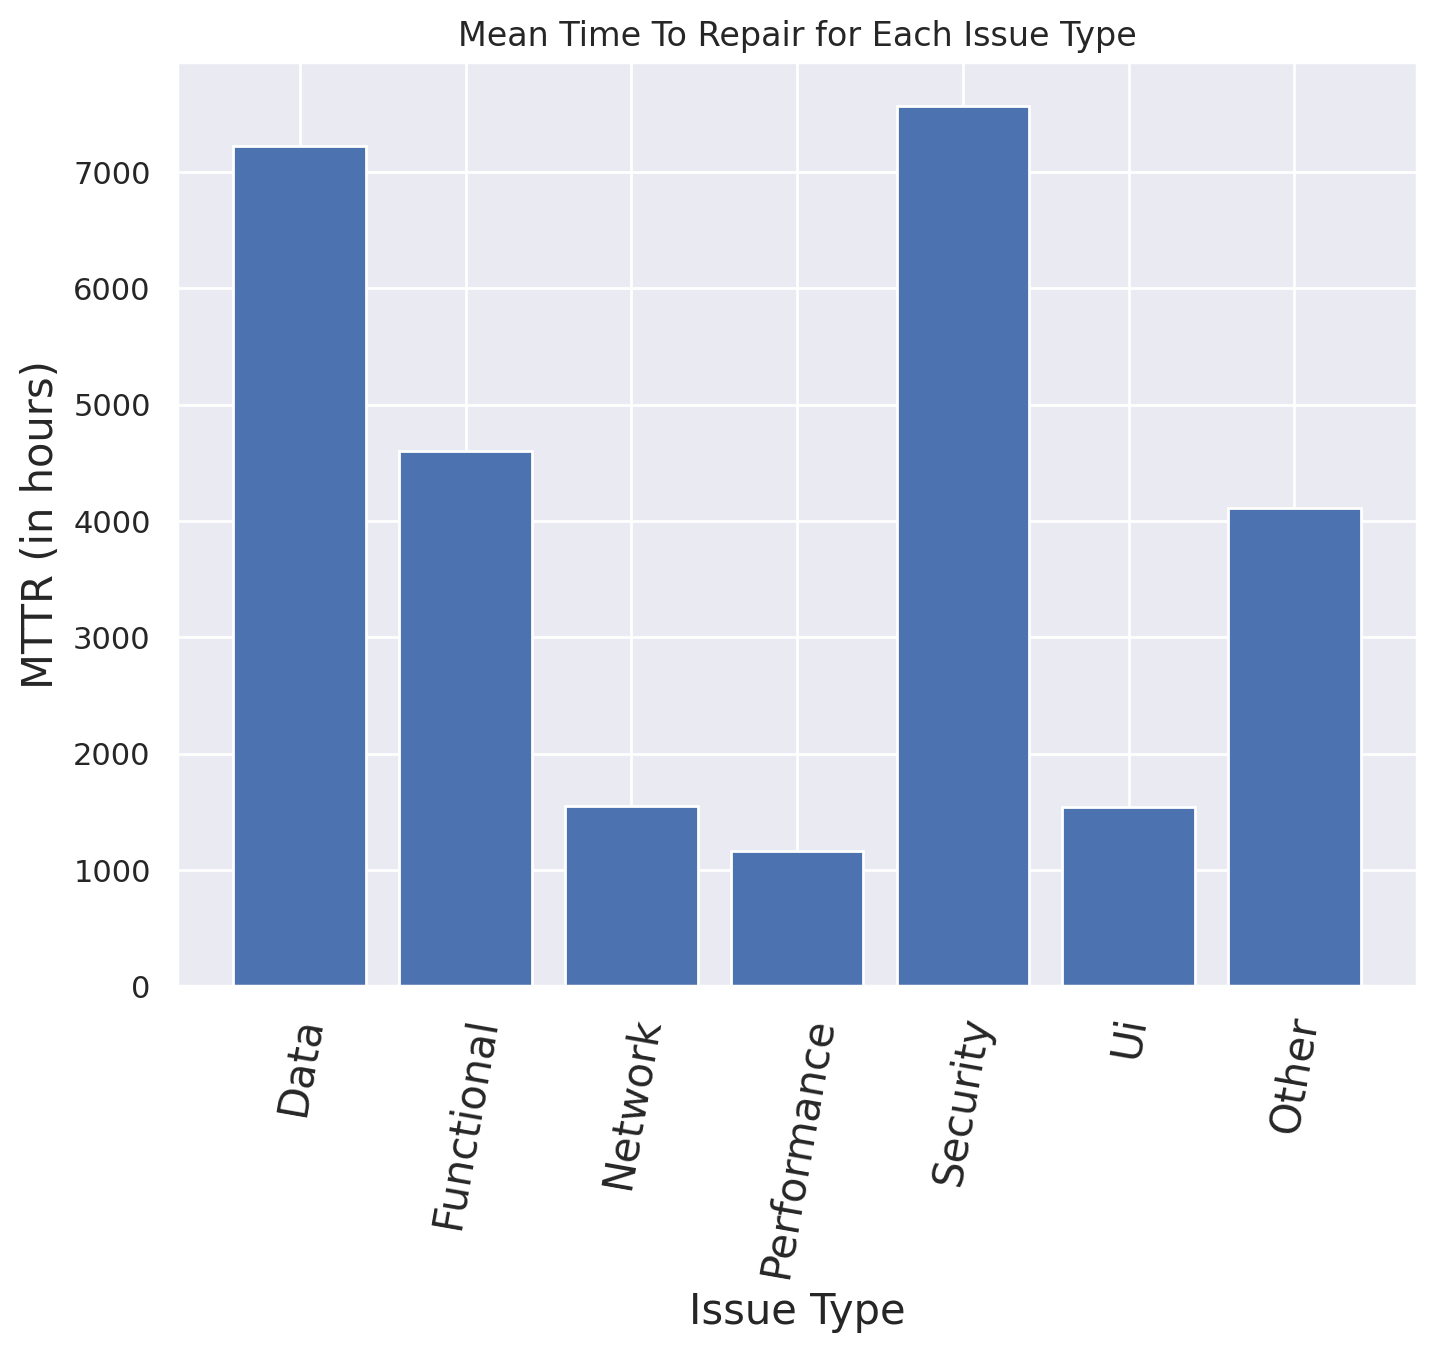

In [ ]:

plt.figure(figsize=(8,6))
index = np.arange(len(final_c))
plt.bar(index,final_mttr)
plt.xlabel('Issue Type', fontsize=15)
plt.ylabel('MTTR (in hours)', fontsize=15)
plt.xticks(index, final_c, fontsize=15, rotation=80)
plt.title('Mean Time To Repair for Each Issue Type')
plt.show()

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
from google.colab import files

dataset.to_csv('final1.csv')
#files.download('final1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset.head(10)

,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,0,LUCENE-7612,13031280,remove suggester dependency on misc,Resolved,analyzinginfixsuggester uses indexsorter which...,Major,Fixed,romseygeek,30/Dec/16 14:31,03/Jan/17 14:11,30/Sep/19 08:28,03/Jan/17 14:11,1
1,1,LUCENE-6582,12838764,synonymfilter should generate a correct or at ...,Resolved,some time ago i had a problem with synonyms an...,Major,Duplicate,NaN,18/Jun/15 11:28,03/Jan/17 10:52,30/Sep/19 08:28,03/Jan/17 10:52,6
2,2,LUCENE-998,12378266,booleanquerysetmaxclausecountint is static,Closed,booleanquerysetmaxclausecountint is static it ...,Major,Won't Fix,NaN,14/Sep/07 09:27,03/Jan/17 02:58,30/Sep/19 08:28,10/Aug/08 00:41,6
3,3,LUCENE-5325,12677286,move valuesource and functionvalues under core,Resolved,spinoff from lucene valuesource and functionva...,Major,Fixed,romseygeek,03/Nov/13 19:47,29/Dec/16 20:29,30/Sep/19 08:28,29/Dec/16 20:29,1
4,4,LUCENE-7605,13030812,analyzinginfixsuggestertesttestrandomnrt failu...,Resolved,while beasting for lucene i found these reprod...,Major,Fixed,NaN,28/Dec/16 02:49,28/Dec/16 19:19,30/Sep/19 08:28,28/Dec/16 19:19,6
5,5,LUCENE-7590,13027257,add docvalues statistics helpers,Resolved,i think it can be useful to have docvalues sta...,Major,Fixed,shaie,11/Dec/16 10:49,21/Dec/16 07:07,30/Sep/19 08:28,18/Dec/16 20:19,0
6,6,LUCENE-7253,12962411,make sparse doc values and segments merging mo...,Resolved,doc values were optimized recently to efficien...,Major,Duplicate,mikemccand,25/Apr/16 22:30,15/Dec/16 21:35,30/Sep/19 08:28,15/Dec/16 21:35,1
7,7,LUCENE-7591,13027387,let datasetsplitter approximate no of class va...,Resolved,currently datasetsplitter throws an exception ...,Major,Fixed,teofili,12/Dec/16 08:59,13/Dec/16 20:30,30/Sep/19 08:28,12/Dec/16 09:00,1
8,8,LUCENE-7581,13025637,indexwriterupdatedocvalues can break index sor...,Resolved,indexwriterupdatedocvalues can break index sor...,Major,Fixed,NaN,05/Dec/16 13:49,13/Dec/16 20:30,30/Sep/19 08:28,09/Dec/16 23:11,6
9,9,LUCENE-7575,13023409,unifiedhighlighter add requirefieldmatchfalse ...,Resolved,the unifiedhighlighter like the postingshighli...,Major,Fixed,dsmiley,25/Nov/16 14:30,10/Dec/16 04:58,30/Sep/19 08:28,10/Dec/16 04:58,1


In [ ]:
print("The data-set has %d rows and %d columns"%(dataset.shape[0],dataset.shape[1]))

The data-set has 5229 rows and 14 columns


In [ ]:
from __future__ import print_function
print (dataset.columns)
for col_name in dataset.columns:
    print (col_name,end=": ")
    print (sum(dataset[col_name].isnull()))

Index(['index', 'Issue key', 'Issue id', 'Summary', 'Status', 'Description',
       'Priority', 'Resolution', 'Assignee', 'Created', 'Updated',
       'Last Viewed', 'Resolved', 'Issue Type'],
      dtype='object')
index: 0
Issue key: 0
Issue id: 0
Summary: 0
Status: 0
Description: 0
Priority: 0
Resolution: 0
Assignee: 1642
Created: 0
Updated: 0
Last Viewed: 0
Resolved: 0
Issue Type: 0


# To see which rows are duplicated

In [ ]:
sum(dataset.duplicated())

0

# finding out class distribution

In [ ]:
category_counter={x:0 for x in set(dataset['Issue Type'])}

In [ ]:
for each_cat in dataset['Issue Type']:
    category_counter[each_cat]+=1

In [ ]:
print(category_counter)

{0: 313, 1: 2081, 2: 112, 3: 77, 4: 52, 5: 381, 6: 2213}


#Combining the Columns of summary and description and then applying NLP

In [ ]:
dataset['Description']

,Description
0,analyzinginfixsuggester uses indexsorter which...
1,some time ago i had a problem with synonyms an...
2,booleanquerysetmaxclausecountint is static it ...
3,spinoff from lucene valuesource and functionva...
4,while beasting for lucene i found these reprod...
...,...
5224,reported by johan stuyts html \n\nfrequency...
5225,solrs prefixfilter class is not specific to so...
5226,just fixed some spelling in the mailinglistxml...
5227,resultsjsp in lucenewebwar demo throws jaspere...


In [ ]:
dataset['Summary']

,Summary
0,remove suggester dependency on misc
1,synonymfilter should generate a correct or at ...
2,booleanquerysetmaxclausecountint is static
3,move valuesource and functionvalues under core
4,analyzinginfixsuggestertesttestrandomnrt failu...
...,...
5224,index file format example for frequency file ...
5225,promote solrs prefixfilter into java lucenes core
5226,fixed spelling mailinglistxml
5227,resultsjsp in lucenewebwar uses unknown parsem...


In [ ]:
dataset["Merger"] = dataset["Summary"].str.cat(dataset["Description"], sep =" \n ")

<ipython-input-78-bfb6230ad13b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset['Merger']

,Merger
0,remove suggester dependency on misc \n analyzi...
1,synonymfilter should generate a correct or at ...
2,booleanquerysetmaxclausecountint is static \n ...
3,move valuesource and functionvalues under core...
4,analyzinginfixsuggestertesttestrandomnrt failu...
...,...
5224,index file format example for frequency file ...
5225,promote solrs prefixfilter into java lucenes c...
5226,fixed spelling mailinglistxml \n just fixed so...
5227,resultsjsp in lucenewebwar uses unknown parsem...


In [ ]:
dataset

,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type,Merger
0,0,LUCENE-7612,13031280,remove suggester dependency on misc,Resolved,analyzinginfixsuggester uses indexsorter which...,Major,Fixed,romseygeek,30/Dec/16 14:31,03/Jan/17 14:11,30/Sep/19 08:28,03/Jan/17 14:11,1,remove suggester dependency on misc \n analyzi...
1,1,LUCENE-6582,12838764,synonymfilter should generate a correct or at ...,Resolved,some time ago i had a problem with synonyms an...,Major,Duplicate,NaN,18/Jun/15 11:28,03/Jan/17 10:52,30/Sep/19 08:28,03/Jan/17 10:52,6,synonymfilter should generate a correct or at ...
2,2,LUCENE-998,12378266,booleanquerysetmaxclausecountint is static,Closed,booleanquerysetmaxclausecountint is static it ...,Major,Won't Fix,NaN,14/Sep/07 09:27,03/Jan/17 02:58,30/Sep/19 08:28,10/Aug/08 00:41,6,booleanquerysetmaxclausecountint is static \n ...
3,3,LUCENE-5325,12677286,move valuesource and functionvalues under core,Resolved,spinoff from lucene valuesource and functionva...,Major,Fixed,romseygeek,03/Nov/13 19:47,29/Dec/16 20:29,30/Sep/19 08:28,29/Dec/16 20:29,1,move valuesource and functionvalues under core...
4,4,LUCENE-7605,13030812,analyzinginfixsuggestertesttestrandomnrt failu...,Resolved,while beasting for lucene i found these reprod...,Major,Fixed,NaN,28/Dec/16 02:49,28/Dec/16 19:19,30/Sep/19 08:28,28/Dec/16 19:19,6,analyzinginfixsuggestertesttestrandomnrt failu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,341,LUCENE-706,12354647,index file format example for frequency file ...,Resolved,reported by johan stuyts html \n\nfrequency...,Trivial,Fixed,gsingers,03/Nov/06 05:40,06/Nov/06 02:21,30/Sep/19 08:38,06/Nov/06 02:21,1,index file format example for frequency file ...
5225,343,LUCENE-676,12350979,promote solrs prefixfilter into java lucenes core,Closed,solrs prefixfilter class is not specific to so...,Trivial,Fixed,yseeley@gmail.com,25/Sep/06 19:25,05/Oct/06 21:10,30/Sep/19 08:38,05/Oct/06 21:10,1,promote solrs prefixfilter into java lucenes c...
5226,344,LUCENE-649,12347796,fixed spelling mailinglistxml,Closed,just fixed some spelling in the mailinglistxml...,Trivial,Fixed,NaN,11/Aug/06 15:20,16/Aug/06 18:32,30/Sep/19 08:38,16/Aug/06 18:32,1,fixed spelling mailinglistxml \n just fixed so...
5227,345,LUCENE-630,12346265,resultsjsp in lucenewebwar uses unknown parsem...,Closed,resultsjsp in lucenewebwar demo throws jaspere...,Trivial,Fixed,NaN,19/Jul/06 15:55,19/Jul/06 18:28,30/Sep/19 08:38,19/Jul/06 18:28,6,resultsjsp in lucenewebwar uses unknown parsem...


In [ ]:
corpus=dataset.Merger
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
tfidf_names=vectorizer.get_feature_names_out()

In [ ]:
print("Number of TFIDF Features: %d"%len(tfidf_names))

Number of TFIDF Features: 31811


In [ ]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

#**Learning Classifiers, Making Predictions and Validating Results**

##**Set the GPU to on before training for lesser training time.**

In [ ]:
dataset.columns=["index","Issue_key","Issue_id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last_Viewed","Resolved","Issue_Type","Merger"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

In [ ]:
dataset

,index,Issue_key,Issue_id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last_Viewed,Resolved,Issue_Type,Merger
0,0,LUCENE-7612,13031280,remove suggester dependency on misc,Resolved,analyzinginfixsuggester uses indexsorter which...,Major,Fixed,romseygeek,30/Dec/16 14:31,03/Jan/17 14:11,30/Sep/19 08:28,03/Jan/17 14:11,1,remove suggester dependency on misc \n analyzi...
1,1,LUCENE-6582,12838764,synonymfilter should generate a correct or at ...,Resolved,some time ago i had a problem with synonyms an...,Major,Duplicate,NaN,18/Jun/15 11:28,03/Jan/17 10:52,30/Sep/19 08:28,03/Jan/17 10:52,6,synonymfilter should generate a correct or at ...
2,2,LUCENE-998,12378266,booleanquerysetmaxclausecountint is static,Closed,booleanquerysetmaxclausecountint is static it ...,Major,Won't Fix,NaN,14/Sep/07 09:27,03/Jan/17 02:58,30/Sep/19 08:28,10/Aug/08 00:41,6,booleanquerysetmaxclausecountint is static \n ...
3,3,LUCENE-5325,12677286,move valuesource and functionvalues under core,Resolved,spinoff from lucene valuesource and functionva...,Major,Fixed,romseygeek,03/Nov/13 19:47,29/Dec/16 20:29,30/Sep/19 08:28,29/Dec/16 20:29,1,move valuesource and functionvalues under core...
4,4,LUCENE-7605,13030812,analyzinginfixsuggestertesttestrandomnrt failu...,Resolved,while beasting for lucene i found these reprod...,Major,Fixed,NaN,28/Dec/16 02:49,28/Dec/16 19:19,30/Sep/19 08:28,28/Dec/16 19:19,6,analyzinginfixsuggestertesttestrandomnrt failu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,341,LUCENE-706,12354647,index file format example for frequency file ...,Resolved,reported by johan stuyts html \n\nfrequency...,Trivial,Fixed,gsingers,03/Nov/06 05:40,06/Nov/06 02:21,30/Sep/19 08:38,06/Nov/06 02:21,1,index file format example for frequency file ...
5225,343,LUCENE-676,12350979,promote solrs prefixfilter into java lucenes core,Closed,solrs prefixfilter class is not specific to so...,Trivial,Fixed,yseeley@gmail.com,25/Sep/06 19:25,05/Oct/06 21:10,30/Sep/19 08:38,05/Oct/06 21:10,1,promote solrs prefixfilter into java lucenes c...
5226,344,LUCENE-649,12347796,fixed spelling mailinglistxml,Closed,just fixed some spelling in the mailinglistxml...,Trivial,Fixed,NaN,11/Aug/06 15:20,16/Aug/06 18:32,30/Sep/19 08:38,16/Aug/06 18:32,1,fixed spelling mailinglistxml \n just fixed so...
5227,345,LUCENE-630,12346265,resultsjsp in lucenewebwar uses unknown parsem...,Closed,resultsjsp in lucenewebwar demo throws jaspere...,Trivial,Fixed,NaN,19/Jul/06 15:55,19/Jul/06 18:28,30/Sep/19 08:38,19/Jul/06 18:28,6,resultsjsp in lucenewebwar uses unknown parsem...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
variables = tfidf_matrix
labels = dataset.Issue_Type
variables_train, variables_test, labels_train, labels_test = train_test_split(variables, labels, test_size=.3)

In [ ]:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (3660, 31811)
Shape of Test Data: (1569, 31811)


#**Applying Naive Bayes**

two types:-
*   Bernoulli
*   Multinomial



In [ ]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

#**Bernoulli**

In [ ]:
from time import time
from sklearn.naive_bayes import BernoulliNB
bnb_classifier=BernoulliNB()
t0=time()
variables_train = np.asarray(variables_train)
labels_train = np.asarray(labels_train)
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0

In [ ]:
t0=time()
variables_test = np.asarray(variables_test)
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [ ]:
prediction_time_container['b_naive_bayes']

0.598376989364624

In [ ]:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [ ]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.604844
Training Time: 1.667203
Prediction Time: 0.598377


In [ ]:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[  4,  98,   0,   0,   0,   0,   0],
       [  2, 580,   0,   0,   0,   0,  51],
       [  0,  17,   0,   0,   0,   0,   9],
       [  0,  22,   0,   0,   0,   0,   4],
       [  0,  14,   0,   0,   0,   0,   1],
       [  0, 103,   0,   0,   0,   0,  15],
       [  1, 277,   2,   0,   0,   4, 365]])

In [ ]:
print("Classification Metrics: ")
print(sklearn.metrics.classification_report(labels_test,bnb_predictions))

Classification Metrics: 
              precision    recall  f1-score   support

           0       0.57      0.04      0.07       102
           1       0.52      0.92      0.67       633
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00       118
           6       0.82      0.56      0.67       649

    accuracy                           0.60      1569
   macro avg       0.27      0.22      0.20      1569
weighted avg       0.59      0.60      0.55      1569



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#**Multinomial Naive Bayes**
Bernoulli Naive Bayes just uses the fact that whether a feature is present or not. However if we somehow also take into account the occurrence weight or count of the feature as well (in our case, the TFIDF weight of each feature), we can hypothesize that the performance of such classifier will be equally good, if not better.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn)
accuracy_container['mn_naive_bayes']=mn_ascore

In [ ]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.622690
Training Time: 0.404690s
Prediction Time: 0.221872s


#**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

Training Time: 15.849926s
Prediction Time: 0.174511s
Accuracy Score of Random Forests Classifier: 
0.6265137029955385
[[  1  95   0   0   0   0   6]
 [  0 490   0   0   0   3 140]
 [  0  11   0   0   0   0  15]
 [  0  13   0   1   0   0  12]
 [  0  14   0   0   1   0   0]
 [  0  73   0   0   0   7  38]
 [  0 166   0   0   0   0 483]]


#**Linear SVM using Stochastic Gradient Descent**
Stochastic Gradient Descent (SGD) is a one of the most efficient approaches used in linear classifiers under convex loss functions such as (linear) Support Vector Machines. It has proven to perform well in in large-scale and sparse machine learning problems.

In [ ]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))

Training Time: 47.175921s
Prediction Time: 0.121913s
Accuracy Score of Linear SVM Classifier: 0.634799
[[  9  80   0   0   0   1  12]
 [  5 464   1   1   2  12 148]
 [  0   8   6   0   0   1  11]
 [  0  16   1   2   0   0   7]
 [  0  12   0   0   2   0   1]
 [  0  58   0   1   0  32  27]
 [  2 161   1   0   0   4 481]]


In [ ]:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)
svm_enet_predictions=svm_classifier_enet.predict(variables_test)
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))

Accuracy Score of Linear SVM Classifier: 0.634799


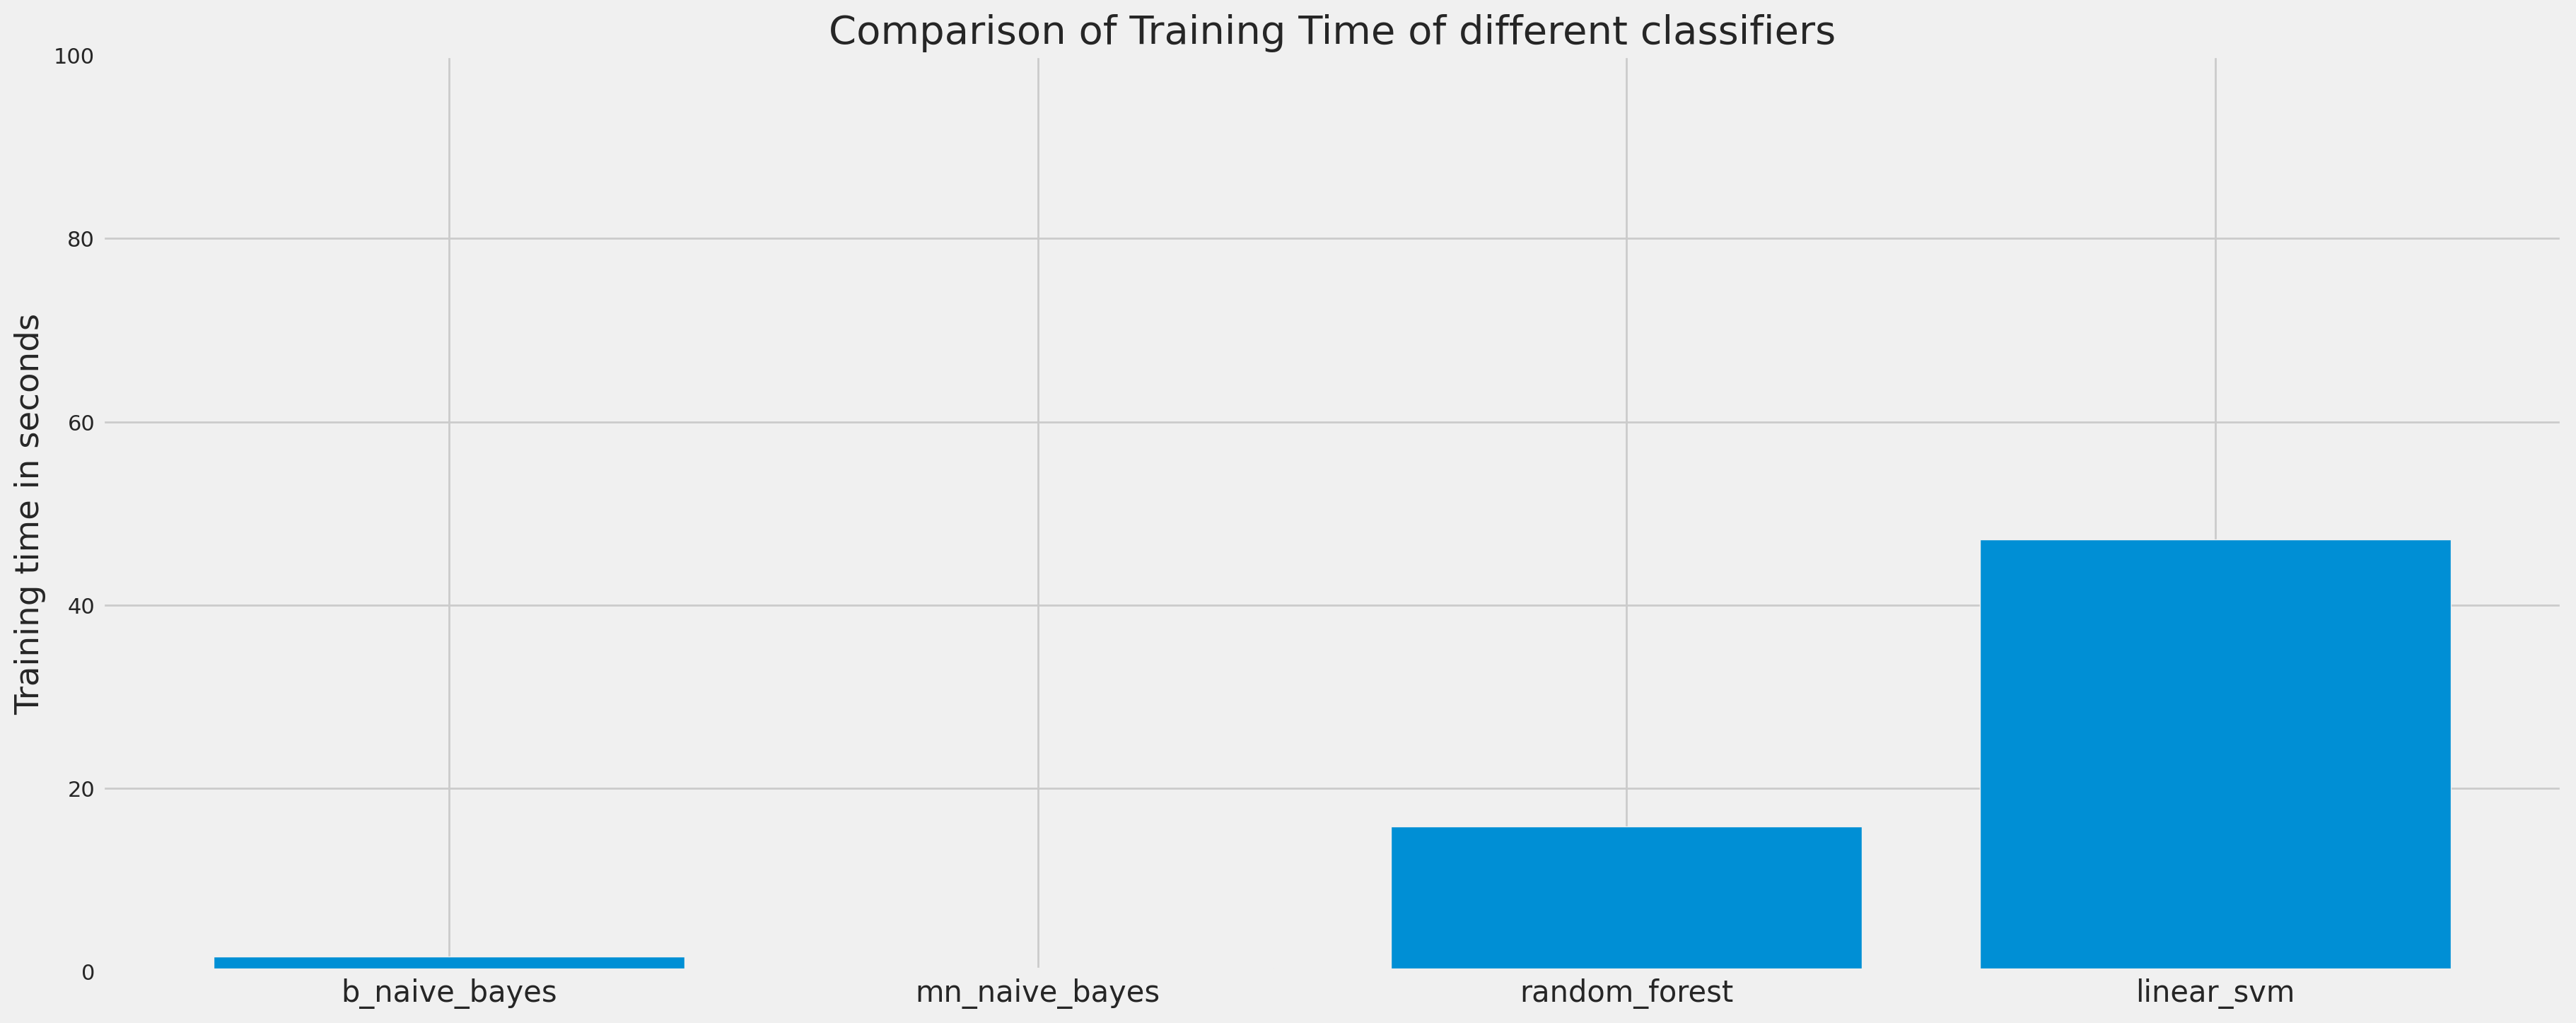

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(range(4),training_time_container.values(),align='center')
    plt.xticks(range(4),training_time_container.keys(),fontsize = 15)
    plt.ylabel("Training time in seconds")
    plt.ylim(0,100)
    plt.grid(True)
    plt.title("Comparison of Training Time of different classifiers")

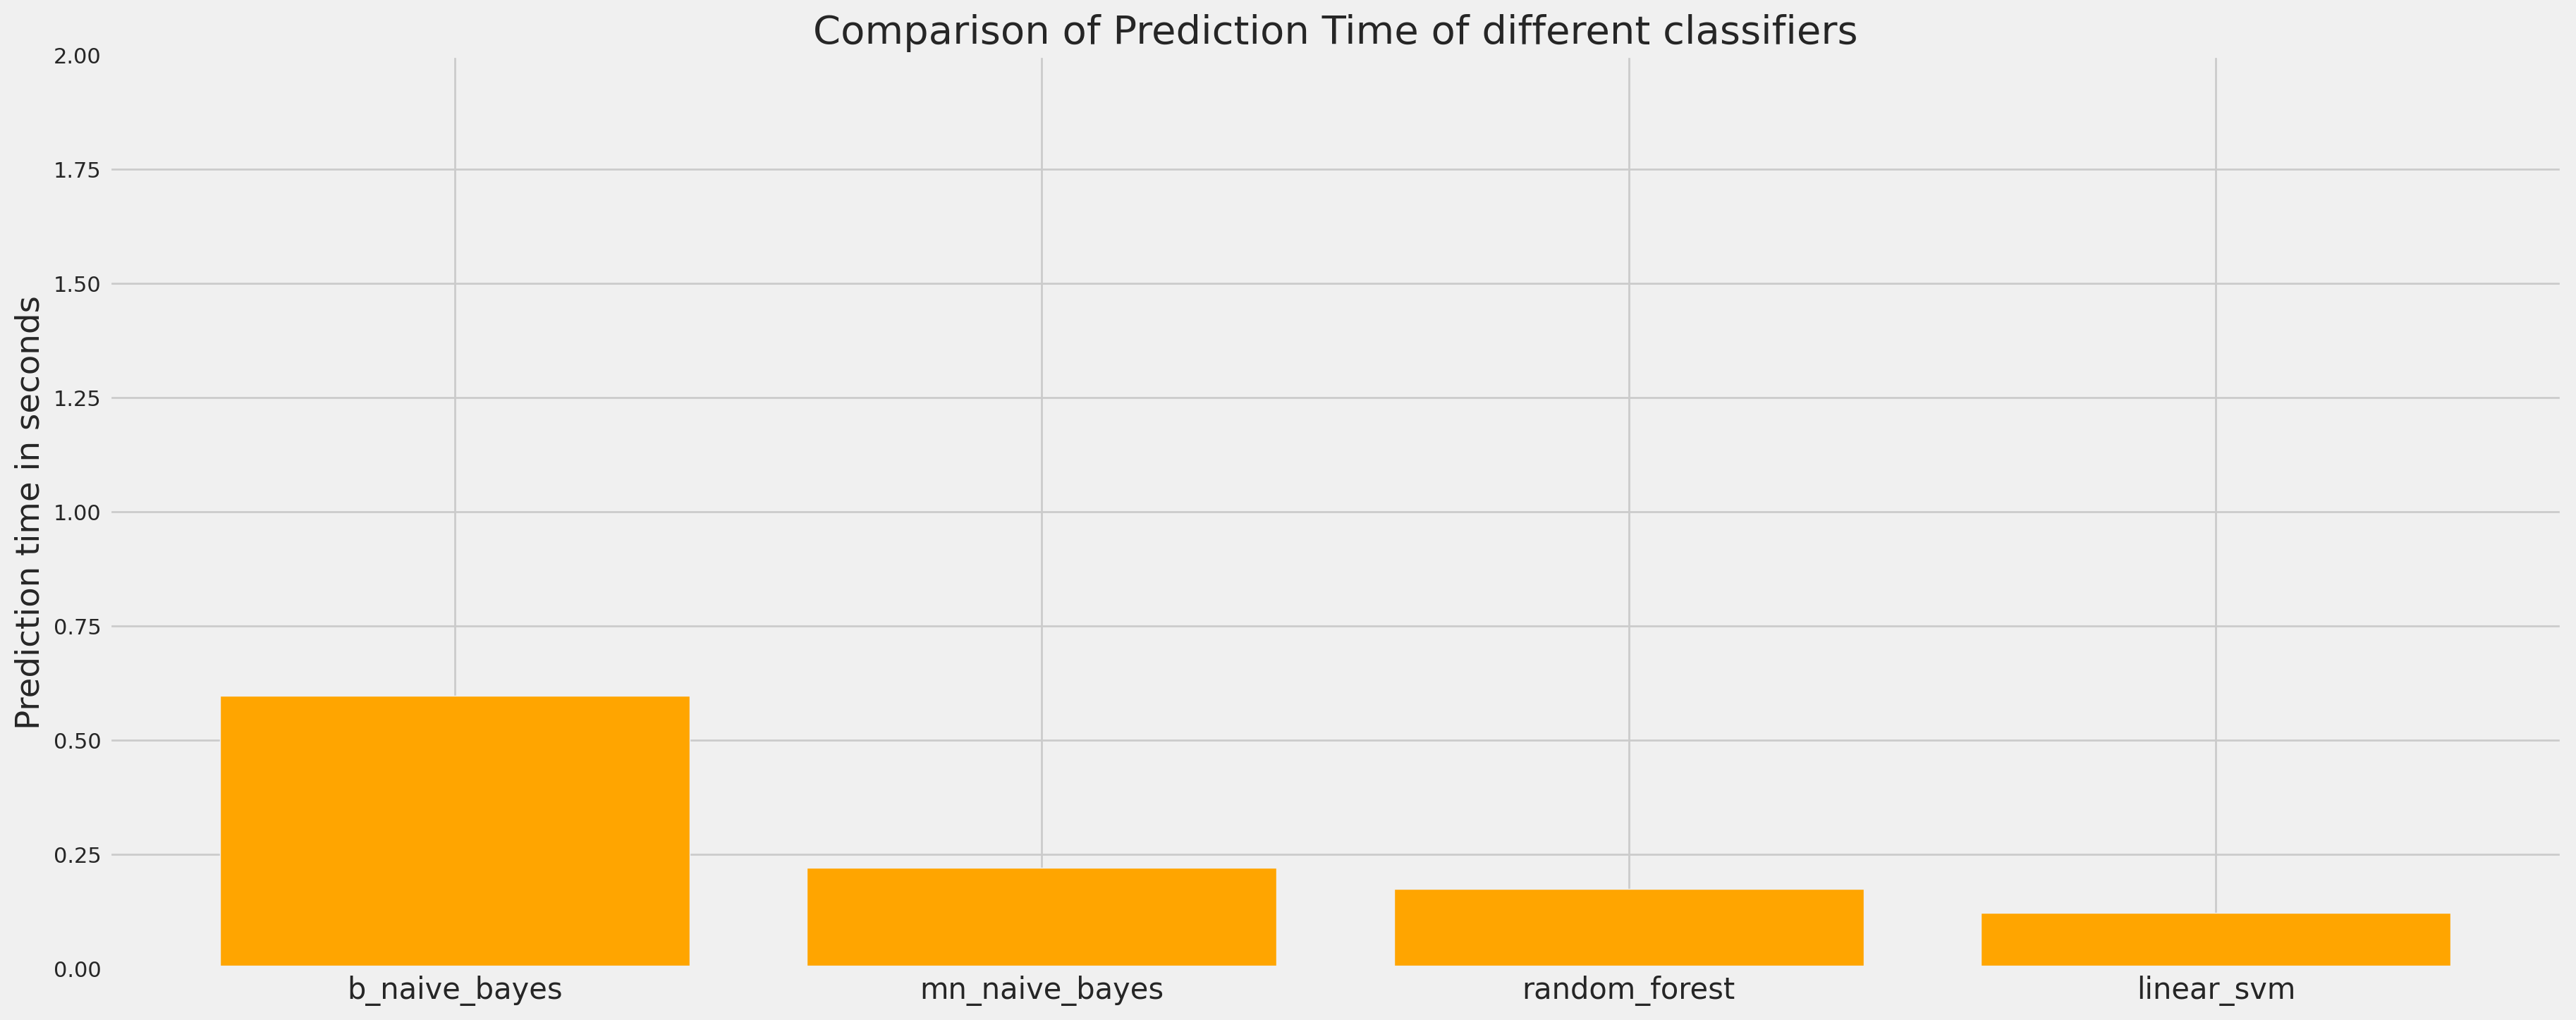

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(range(4),prediction_time_container.values(),align='center',color='orange')
    plt.xticks(range(4),prediction_time_container.keys(),fontsize = 15)
    plt.ylabel("Prediction time in seconds")
    plt.grid(True)
    plt.ylim(0,2)
    plt.title("Comparison of Prediction Time of different classifiers")

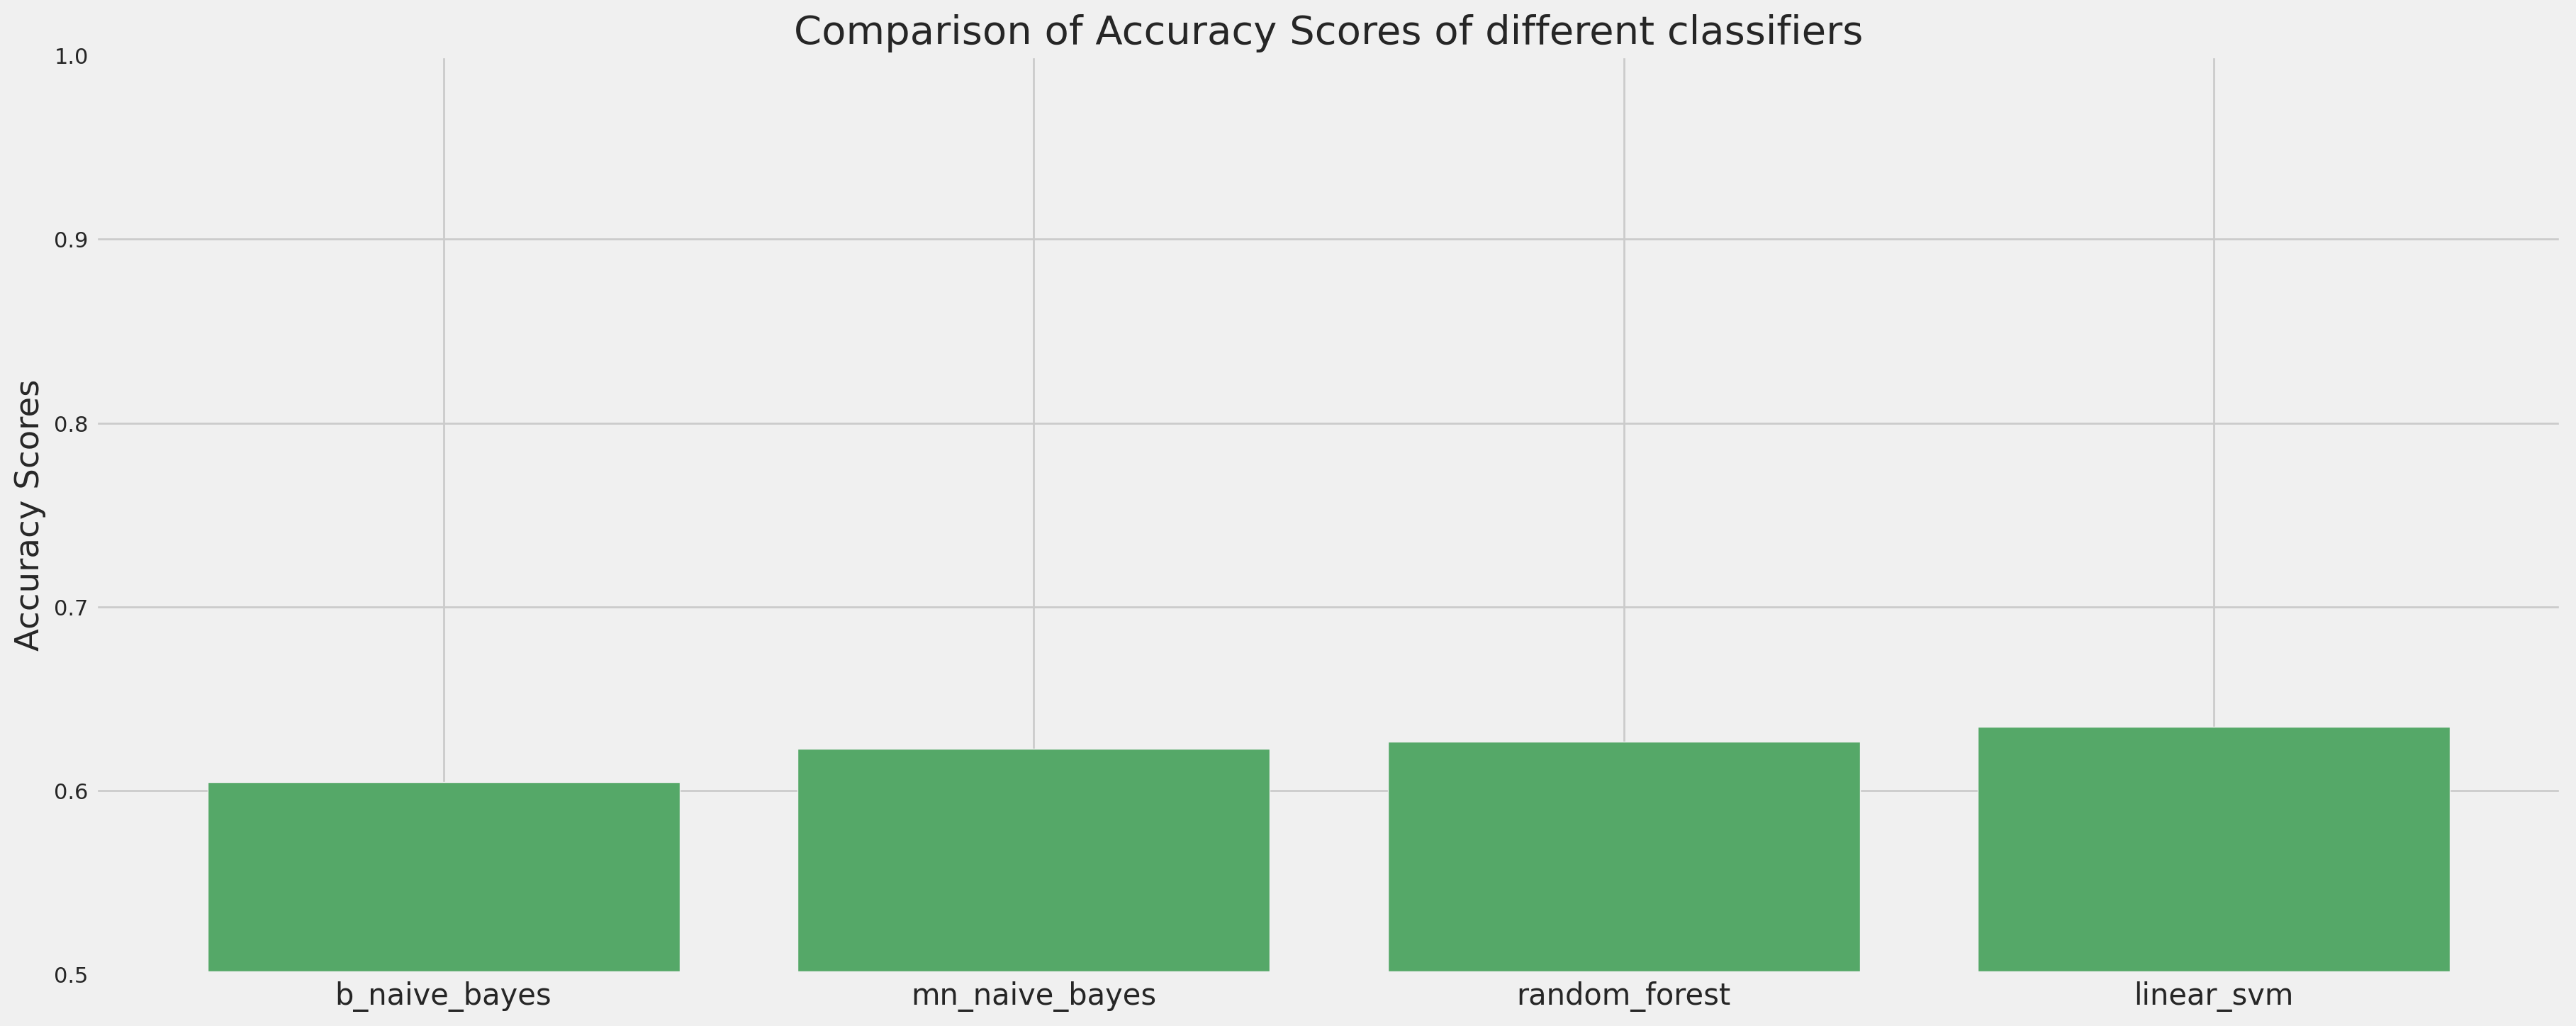

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(range(4),accuracy_container.values(),align='center',color='g')
    plt.xticks(range(4),accuracy_container.keys(),fontsize = 15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.5,1.0)

#**Hard Voting / Majority Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('Bernoulli',bnb_classifier))
estimators.append(('Multinomial',mn_bayes))
estimators.append(('RandomForest',rf_classifier))
estimators.append(('SVMLinear',svm_classifier))
ensemble = VotingClassifier(estimators,voting = 'hard')

In [ ]:

t0=time()
ensemble.fit(variables_train, labels_train)

ensemble_training_time=time()-t0
training_time_container['Hard'] = ensemble_training_time
print("Training Time: %fs"%ensemble_training_time)

ensemble.score(variables_test, labels_test)

Training Time: 60.430967s


0.627151051625239

In [ ]:
t0=time()
ensemble_predictions=ensemble.predict(variables_test)
ensemble_prediction_time = time() - t0
prediction_time_container['Hard'] = ensemble_prediction_time
print("Prediction Time: %fs"%ensemble_prediction_time)

accuracy_container['Ensemble_hard']=sklearn.metrics.accuracy_score(labels_test, ensemble_predictions)
print("Accuracy Score of Hard-Voting Ensemble is : %f" %accuracy_container['Ensemble_hard'])

print(sklearn.metrics.confusion_matrix(labels_test,ensemble_predictions))

Prediction Time: 1.433433s
Accuracy Score of Hard-Voting Ensemble is : 0.627151
[[  2  97   0   0   0   0   3]
 [  0 558   0   0   0   0  75]
 [  0  18   0   0   0   0   8]
 [  0  20   0   0   0   0   6]
 [  0  14   0   0   1   0   0]
 [  0  91   0   0   0   0  27]
 [  0 226   0   0   0   0 423]]


In [ ]:
svm_classifier=svm_classifier.fit(variables_train, labels_train)
from sklearn.calibration import CalibratedClassifierCV
svm_calibrator = CalibratedClassifierCV(svm_classifier, cv='prefit')
svm_calibrator = svm_calibrator.fit(variables_train, labels_train)

In [ ]:
estimators1 = []
estimators1.append(('Bernoulli',bnb_classifier))
estimators1.append(('Multinomial',mn_bayes))
estimators1.append(('RandomForest',rf_classifier))
ensemble2 = VotingClassifier(estimators1,voting = 'soft')

t0=time()
ensemble2.fit(variables_train, labels_train)

ensemble2_training_time=time()-t0
print("Training Time: %fs"%ensemble2_training_time)

print("Accuracy: %fs"%ensemble2.score(variables_test, labels_test))
t0=time()
ensemble2_predictions=ensemble2.predict(variables_test)
ensemble2_prediction_time = time() - t0
training_time_container['soft'] = ensemble2_training_time
prediction_time_container['soft'] = ensemble2_prediction_time
print("Prediction Time: %fs"%ensemble2_prediction_time)

accuracy_container['Ensemble_soft']=sklearn.metrics.accuracy_score(labels_test, ensemble2_predictions)
print("Accuracy Score of Soft-Voting Ensemble is : %f" %accuracy_container['Ensemble_soft'])

print(sklearn.metrics.confusion_matrix(labels_test,ensemble2_predictions))

Training Time: 16.924798s
Accuracy: 0.625239s
Prediction Time: 0.762290s
Accuracy Score of Soft-Voting Ensemble is : 0.625239
[[  2 100   0   0   0   0   0]
 [  1 575   0   0   0   0  57]
 [  0  16   0   0   0   0  10]
 [  0  20   0   0   0   0   6]
 [  0  14   0   0   0   0   1]
 [  0 100   0   0   0   0  18]
 [  0 245   0   0   0   0 404]]


#**Bagged Decision Trees**
## BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.

In [ ]:
from time import time
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
num_trees = 100       #tweaking this value for accuracy increase, but keep an eye for overfitting.
Bagging_classifier= BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=random.seed())
t0=time()
Bagging_classifier.fit(variables_train, labels_train)

BaggingClassifier_training_time=time()-t0
print("Training Time: %fs"%BaggingClassifier_training_time)
training_time_container['bagging'] = BaggingClassifier_training_time

#test our model on the test data
print("Accuracy: %fs"%Bagging_classifier.score(variables_test, labels_test))


Training Time: 619.770052s
Accuracy: 0.602294s


In [ ]:
t0=time()
BaggingClassifier_predictions=Bagging_classifier.predict(variables_test)
BaggingClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%BaggingClassifier_prediction_time)
prediction_time_container['bagging'] = BaggingClassifier_prediction_time

accuracy_container['Bagging_classifier']=sklearn.metrics.accuracy_score(labels_test, BaggingClassifier_predictions)
print("Accuracy Score of Bagging classifier is : %f" %accuracy_container['Bagging_classifier'])

print(sklearn.metrics.confusion_matrix(labels_test,BaggingClassifier_predictions))

Prediction Time: 36.018890s
Accuracy Score of Bagging classifier is : 0.602294
[[  1  91   0   0   0   1   9]
 [  0 453   2   0   0   7 171]
 [  0  10   1   0   0   1  14]
 [  0  15   0   0   0   0  11]
 [  0  12   0   0   1   0   2]
 [  1  61   0   0   0  15  41]
 [  1 171   2   0   0   1 474]]


#**Boosting Algorithm**
##**Adaboost**

It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 100
Adaboost_classifier = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
t0=time()
Adaboost_classifier.fit(variables_train, labels_train)

AdaboostClassifier_training_time=time()-t0
print("Training Time: %fs"%AdaboostClassifier_training_time)

print("Accuracy: %fs"%Adaboost_classifier.score(variables_test, labels_test))
t0=time()
AdaboostClassifier_predictions = Adaboost_classifier.predict(variables_test)
AdaboostClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%AdaboostClassifier_prediction_time)
training_time_container['adaboost'] = AdaboostClassifier_training_time
prediction_time_container['adaboost'] = AdaboostClassifier_prediction_time

accuracy_container['Adaboost_classifier']=sklearn.metrics.accuracy_score(labels_test, AdaboostClassifier_predictions)
print("Accuracy Score of Adaboost classifier is : %f" %accuracy_container['Adaboost_classifier'])

print(sklearn.metrics.confusion_matrix(labels_test,AdaboostClassifier_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Training Time: 191.263126s
Accuracy: 0.442957s
Prediction Time: 11.985058s
Accuracy Score of Adaboost classifier is : 0.442957
[[  3  89   1   1   0   0   8]
 [  5 536   3  28   0   6  55]
 [  0   5   9   5   0   0   7]
 [  0  17   1   0   0   1   7]
 [  0  15   0   0   0   0   0]
 [  2  99   4   4   0   0   9]
 [ 10 456  10  26   0   0 147]]


##**Stochastic Gradient Boosting**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
SGB_classifier = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
t0=time()
SGB_classifier.fit(variables_train, labels_train)

SGBClassifier_training_time=time()-t0
print("Training Time: %fs"%SGBClassifier_training_time)

print("Accuracy: %fs"%SGB_classifier.score(variables_test, labels_test))
t0=time()
SGBClassifier_predictions = SGB_classifier.predict(variables_test)
SGBClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%SGBClassifier_prediction_time)
training_time_container['sgb'] = SGBClassifier_training_time
prediction_time_container['sgb'] = SGBClassifier_prediction_time

accuracy_container['SGB_classifier']=sklearn.metrics.accuracy_score(labels_test, SGBClassifier_predictions)
print("Accuracy Score of SGB_classifier is : %f" %accuracy_container['SGB_classifier'])

print(sklearn.metrics.confusion_matrix(labels_test,SGBClassifier_predictions))

NameError: name 'time' is not defined

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),accuracy_container.values(),align='center',color='g')
    plt.xticks(range(9),accuracy_container.keys(),fontsize = 15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.3,1.0)

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),training_time_container.values(),align='center',color='g')
    plt.xticks(range(9),training_time_container.keys(),fontsize = 15)
    plt.ylabel("training time")
    plt.grid(True)
    plt.title("Comparison of training time of different classifiers")
    plt.ylim(0.3,1.0)

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),prediction_time_container.values(),align='center',color='g')
    plt.xticks(range(9),prediction_time_container.keys(),fontsize = 15)
    plt.ylabel("prediction time")
    plt.grid(True)
    plt.title("Comparison of prediction time of different classifiers")
    plt.ylim(0.3,1.0)